In [3]:
require(data.table)
require(ggplot2)
require(dplyr)
require(qqman)
setwd("~/WGS/SNPS/All_mylu/snps/")

In [6]:
nje=fread("~/WGS/SNPS/All_mylu/mafs/NJ_E_filt1.mafs", header=FALSE)
nju=fread("~/WGS/SNPS/All_mylu/mafs/NJ_U_filt1.mafs", header=FALSE)
nye=fread("~/WGS/SNPS/All_mylu/mafs/NY_E_filt1.mafs", header=FALSE)
nyu=fread("~/WGS/SNPS/All_mylu/mafs/NY_U_filt1.mafs", header=FALSE)
vte=fread("~/WGS/SNPS/All_mylu/mafs/VT_E_filt1.mafs", header=FALSE)
vtu=fread("~/WGS/SNPS/All_mylu/mafs/VT_U_filt1.mafs", header=FALSE)

Read 44829666 rows and 8 (of 8) columns from 2.119 GB file in 00:01:19
Read 44829666 rows and 8 (of 8) columns from 2.108 GB file in 00:00:45
Read 44829666 rows and 8 (of 8) columns from 2.112 GB file in 00:01:15
Read 44829666 rows and 8 (of 8) columns from 2.117 GB file in 00:00:53
Read 44829666 rows and 8 (of 8) columns from 2.118 GB file in 00:01:22
Read 44829666 rows and 8 (of 8) columns from 2.119 GB file in 00:00:58


In [7]:
colnames(nje)=c("Scaffold", "Position", "Major", "Minor", "Maf1_E", "Maf2_E", "Maf3_E", "nInd_E")
colnames(nye)=c("Scaffold", "Position", "Major", "Minor", "Maf1_E", "Maf2_E", "Maf3_E", "nInd_E")
colnames(vte)=c("Scaffold", "Position", "Major", "Minor", "Maf1_E", "Maf2_E", "Maf3_E", "nInd_E")
colnames(nju)=c("Scaffold", "Position", "Major", "Minor", "Maf1_U", "Maf2_U", "Maf3_U", "nInd_U")
colnames(nyu)=c("Scaffold", "Position", "Major", "Minor", "Maf1_U", "Maf2_U", "Maf3_U", "nInd_U")
colnames(vtu)=c("Scaffold", "Position", "Major", "Minor", "Maf1_U", "Maf2_U", "Maf3_U", "nInd_U")

In [8]:
njeu=merge(nje, nju, by=c("Scaffold", "Position"))
nyeu=merge(nye, nyu, by=c("Scaffold", "Position"))
vteu=merge(vte, vtu, by=c("Scaffold", "Position"))

In [9]:
njeu=na.omit(njeu)
nyeu=na.omit(nyeu)
vteu=na.omit(vteu)

In [10]:
NROW(njeu)

[1] 44829587

In [11]:
njeu$diff=njeu$Maf2_E-njeu$Maf2_U
nyeu$diff=nyeu$Maf2_E-nyeu$Maf2_U
vteu$diff=vteu$Maf2_E-vteu$Maf2_U

In [48]:
njeu$diff2=njeu$Maf1_E-njeu$Maf1_U
nyeu$diff2=nyeu$Maf1_E-nyeu$Maf1_U
vteu$diff2=vteu$Maf1_E-vteu$Maf1_U

In [18]:
njnyeu=merge(njeu, nyeu, by=c("Scaffold", "Position"))
njnyvteu=merge(njnyeu, vteu, by=c("Scaffold", "Position"))

In [7]:
njnyvteu$diffav=rowMeans(cbind(njnyvteu$diff.y, njnyvteu$diff.x, njnyvteu$diff))

In [9]:
njeuneg=njeu[njeu$diff<0,]
nyeuneg=nyeu[nyeu$diff<0,]
vteuneg=vteu[vteu$diff<0,]

In [12]:
njeusnpsAll=njeu[!njeu$diff==0,]


In [13]:
nyeusnpsAll=nyeu[!nyeu$diff==0,]
vteusnpsAll=vteu[!vteu$diff==0,]


In [14]:
write.csv(vteusnpsAll, file="vteusnpsAll.csv")
write.csv(njeusnpsAll, file="njeusnpsAll.csv")
write.csv(nyeusnpsAll, file="nyeusnpsAll.csv")

In [26]:
njeusnps=njeu[njeu$diff>0,]
nyeusnps=nyeu[nyeu$diff>0,]
vteusnps=vteu[vteu$diff>0,]

In [ ]:
write.csv(vteusnps, file="vteusnps.csv")
write.csv(njeusnps, file="njeusnps.csv")
write.csv(nyeusnps, file="nyeusnps.csv")

In [5]:
#vteusnps=fread("vteusnps.csv")
#njeusnps=fread("njeusnps.csv")
#nyeusnps=fread("nyeusnps.csv")
vteuneg=fread("vteuneg.csv")
njeuneg=fread("njeuneg.csv")
nyeuneg=fread("nyeuneg.csv")

ERROR: Error in fread("njeuneg.csv"): File 'njeuneg.csv' does not exist. Include one or more spaces to consider the input a system command.


In [ ]:
njeusnpsAll=rbind(njeusnps, njeuneg)
nyeusnpsAll=rbind(nyeusnps, nyeuneg)
vteusnpsAll=rbind(vteusnps, vteuneg)

In [2]:
nyout=fread("NY_U_noOut_filt.mafs")
vtout=fread("VT_U_noOut_filt.mafs")

Read 44829616 rows and 8 (of 8) columns from 2.113 GB file in 00:00:46
Read 44829285 rows and 8 (of 8) columns from 2.117 GB file in 00:00:49


We need to know how many snps are changing in the same direction in all three pops to calculate our bonferroni threshold


In [29]:
head(njeusnps)

V1,Scaffold,Position,Major.x,Minor.x,Maf1_E,Maf2_E,Maf3_E,nInd_E,Major.y,Minor.y,Maf1_U,Maf2_U,Maf3_U,nInd_U,diff,nInd
1,AAPE02055386,67765,C,T,0.000000,0.000003,0.000000,11,C,T,0.000000,0.000002,0.000000,6,0.000001,5
2,AAPE02055386,67766,G,A,0.062912,0.020990,0.038813,11,G,A,0.000000,0.000002,0.000000,7,0.020988,4
3,AAPE02055386,67795,C,T,0.255406,0.255405,0.262683,12,C,T,0.343627,0.092649,0.340182,7,0.162756,5
4,AAPE02055386,114473,G,T,0.301035,0.117676,0.327008,12,G,T,0.089851,0.086942,0.048277,9,0.030734,3
5,AAPE02055386,114518,T,C,0.222339,0.221806,0.222569,14,T,C,0.149049,0.147735,0.097787,10,0.074071,4
6,AAPE02055386,114530,A,C,0.260275,0.260277,0.270421,12,A,C,0.074340,0.025903,0.078104,11,0.234374,1


In [40]:
njeusnps$diff2=njeusnps$Maf3_E-njeusnps$Maf3_U

In [59]:
njeusnps2=njeu[njeu$diff2>0,]
nyeusnps2=nyeu[nyeu$diff2>0,]
vteusnps2=vteu[vteu$diff2>0,]

In [66]:
njeuneg2=njeu[njeu$diff2<0,]
nyeuneg2=nyeu[nyeu$diff2<0,]
vteuneg2=vteu[vteu$diff2<0,]

Have to have at least 6 individuals in a population

And have to have a max difference between exposed and unexposed of 8.

In [7]:
njeusnps$nInd=abs(njeusnps$nInd_E-njeusnps$nInd_U)
nyeusnps$nInd=abs(nyeusnps$nInd_E-nyeusnps$nInd_U)
#vteusnps$nInd=abs(vteusnps$nInd_E-vteusnps$nInd_U)

In [8]:
njeuneg$nInd=abs(njeuneg$nInd_E-njeuneg$nInd_U)
nyeuneg$nInd=abs(nyeuneg$nInd_E-nyeuneg$nInd_U)
#vteuneg$nInd=abs(vteuneg$nInd_E-vteuneg$nInd_U)

In [9]:
njeusnpsfilt=njeusnps[njeusnps$nInd<=8 & njeusnps$nInd_E>=6 & njeusnps$nInd_U>=6 ,]
nyeusnpsfilt=nyeusnps[nyeusnps$nInd<=8 & nyeusnps$nInd_E>=6 & nyeusnps$nInd_U>=6 ,]
#vteusnpsfilt=vteusnps[vteusnps$nInd<=8 & vteusnps$nInd_E>=6 & vteusnps$nInd_U>=6 ,]

In [10]:
njeunegfilt=njeuneg[njeuneg$nInd<=8 & njeuneg$nInd_E>=6 & njeuneg$nInd_U>=6 ,]
nyeunegfilt=nyeuneg[nyeuneg$nInd<=8 & nyeuneg$nInd_E>=6 & nyeuneg$nInd_U>=6 ,]
#vteunegfilt=vteuneg[vteuneg$nInd<=8 & vteuneg$nInd_E>=6 & vteuneg$nInd_U>=6 ,]

In [11]:
njeusnpsAllfilt=rbind(njeusnpsfilt, njeunegfilt)
nyeusnpsAllfilt=rbind(nyeusnpsfilt, nyeunegfilt)
#vteusnpsAllfilt=rbind(vteusnpsfilt, vteunegfilt)

In [13]:
NROW(njeusnpsAllfilt)
NROW(nyeusnpsAllfilt)
#NROW(vteusnpsAllfilt)

[1] 41492214

[1] 41824196

In [7]:
njnyeusnpAll=merge(njeusnpsAll, nyeusnpsAll, by=c("Scaffold", "Position"))

In [9]:
NROW(njnyeusnpAll)

[1] 40952833

In [ ]:
njnyeusnpAll$avdiffnjny=apply(X=cbind(njnyeusnpAll$diff.x, njnyeusnpAll$diff.y), 1, FUN=mean)

In [85]:
njnyvteusnps2filt=merge(njnyeusnps2filt, vteusnps2filt, by=c("Scaffold", "Position"))

In [86]:
NROW(njnyvteusnps2filt)

[1] 3010754

In [17]:
njnyeunegfilt=merge(njeunegfilt, nyeunegfilt, by=c("Scaffold", "Position"))

In [18]:
NROW(njnyeunegfilt)

[1] 9767908

In [88]:
njnyvteuneg2filt=merge(njnyeuneg2filt, vteuneg2filt, by=c("Scaffold", "Position"))

In [89]:
NROW(njnyvteuneg2filt)

[1] 2962829

In [78]:
NROW(nyeusnps2)

[1] 16918363

In [79]:
head(njeusnps2)

Scaffold,Position,Major.x,Minor.x,Maf1_E,Maf2_E,Maf3_E,nInd_E,Major.y,Minor.y,Maf1_U,Maf2_U,Maf3_U,nInd_U,diff2
AAPE02055386,67766,G,A,0.062912,0.020990,0.038813,11,G,A,0.000000,0.000002,0.000000,7,0.062912
AAPE02055386,114473,G,T,0.301035,0.117676,0.327008,12,G,T,0.089851,0.086942,0.048277,9,0.211184
AAPE02055386,114503,G,C,0.250570,0.094682,0.253549,12,G,C,0.141403,0.140738,0.093782,10,0.109167
AAPE02055386,114518,T,C,0.222339,0.221806,0.222569,14,T,C,0.149049,0.147735,0.097787,10,0.073290
AAPE02055386,114530,A,C,0.260275,0.260277,0.270421,12,A,C,0.074340,0.025903,0.078104,11,0.185935
AAPE02055386,114905,A,G,0.168444,0.168444,0.180239,16,A,G,0.000000,0.000004,0.000000,8,0.168444



- What does the distribution of coverage look like across loci? 

- Is coverage related to allele frequency change?
No.

- Do other loci in the vicinity of these 10 also show large allele frequency changes? On average, I think you should have a SNP every 32 bp on average. A sliding window analysis would be another way to look for this effect.

quesiton: how big of a sliding window. Need to take output from snp analysis and figure out FST value for it. 
Look at SNPs nearby...within 100 basepairs?



What about a soft sweep across all three populations?
Rank snps in each population according to change in allele frequency. then look for overlaps betweeen nearby snps (doesn't have to be the same SNP in every poulation) THIS IS especially true if they are loss of function mutations. 

IF the starting allele frequency is high, then we wouldn't expect to see changes in diversity or linkage disequilibrium. 


## 1. "Hard" sweep 
High change in allele frequency, low (nonexistant?) starting allele frequency
High LD in large region around snp
Reduction in diversity around SNP

## 2. Soft sweep from SGV
High change in allele frequency, low starting allele frequency
High LD in small? region around snp in post--not pre?
Reduction in diversity around SNP smaller window? compare pre-post

## 3. Soft sweep from SGV across populations
Hard ish sweep within populations
High change in allele frequency within a population, low (nonexistant?) starting allele frequency
High LD in small? region around snp in post--not pre?
Reduction in diversity around SNP smaller window? compare pre-post

## 4.  Very soft sweep from SGV across populations.
Hard ish sweep within populations
High change in allele frequency within a population, High starting allele frequency
No signatures of LD or diversity


## 5. Very very soft sweep from SGV across populations.
Undetectable?





# Compare change in frequency in nuclear region to mitochondrial region

In [6]:
AAPE02072785nj=njeusnps[Scaffold=="AAPE02072785",]
AAPE02072785ny=nyeusnps[Scaffold=="AAPE02072785",]
AAPE02072785vt=vteusnps[Scaffold=="AAPE02072785",]
AAPE02072785nj=AAPE02072785nj[order(-AAPE02072785nj$diff),] 
AAPE02072785ny=AAPE02072785ny[order(-AAPE02072785ny$diff),] 
AAPE02072785vt=AAPE02072785vt[order(-AAPE02072785vt$diff),] 

In [7]:
AAPE02072785njn=njeuneg[Scaffold=="AAPE02072785",]
AAPE02072785nyn=nyeuneg[Scaffold=="AAPE02072785",]
AAPE02072785vtn=vteuneg[Scaffold=="AAPE02072785",]
AAPE02072785njn=AAPE02072785njn[order(-AAPE02072785njn$diff),] 
AAPE02072785nyn=AAPE02072785nyn[order(-AAPE02072785nyn$diff),] 
AAPE02072785vtn=AAPE02072785vtn[order(-AAPE02072785vtn$diff),] 

In [8]:
njeunuc=njeusnps[Scaffold!="AAPE02072785",]
nyeunuc=nyeusnps[Scaffold!="AAPE02072785",]
vteunuc=vteusnps[Scaffold!="AAPE02072785",]
njeunucn=njeuneg[Scaffold!="AAPE02072785",]
nyeunucn=nyeuneg[Scaffold!="AAPE02072785",]
vteunucn=vteuneg[Scaffold!="AAPE02072785",]

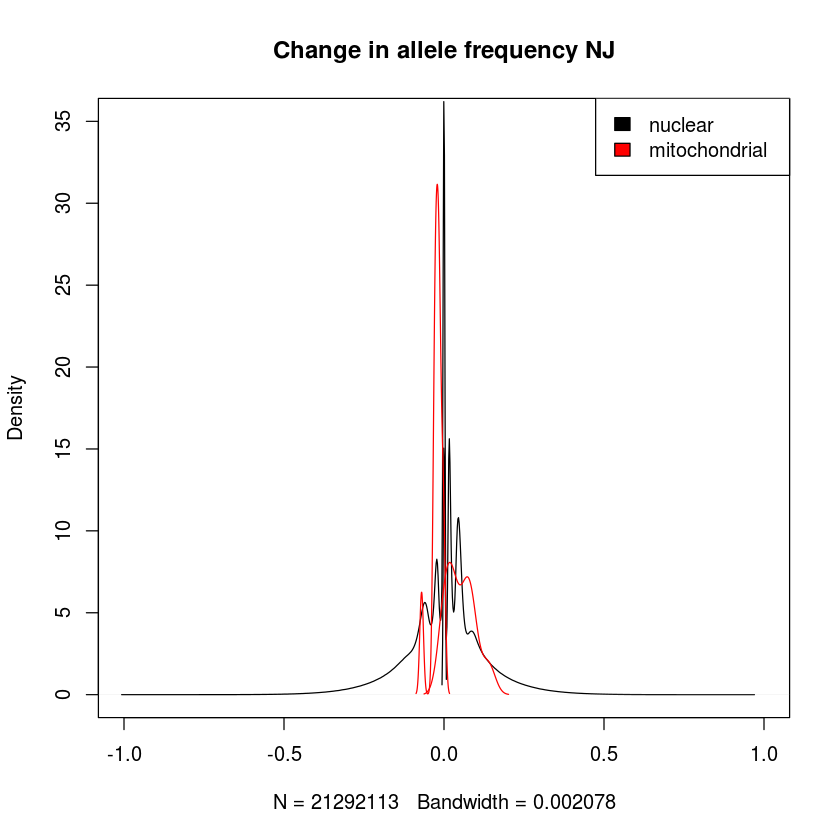

In [13]:
plot(density(njeunuc$diff), main="Change in allele frequency NJ", xlim=c(-1,1), ylim=c(0, 35))
    lines(density(njeunucn$diff), col="black") 
    lines(density(AAPE02072785nj$diff), col="red") 
    lines(density(AAPE02072785njn$diff), col="red") 
legend("topright", c("nuclear", "mitochondrial"), fill=c("black", "red"))

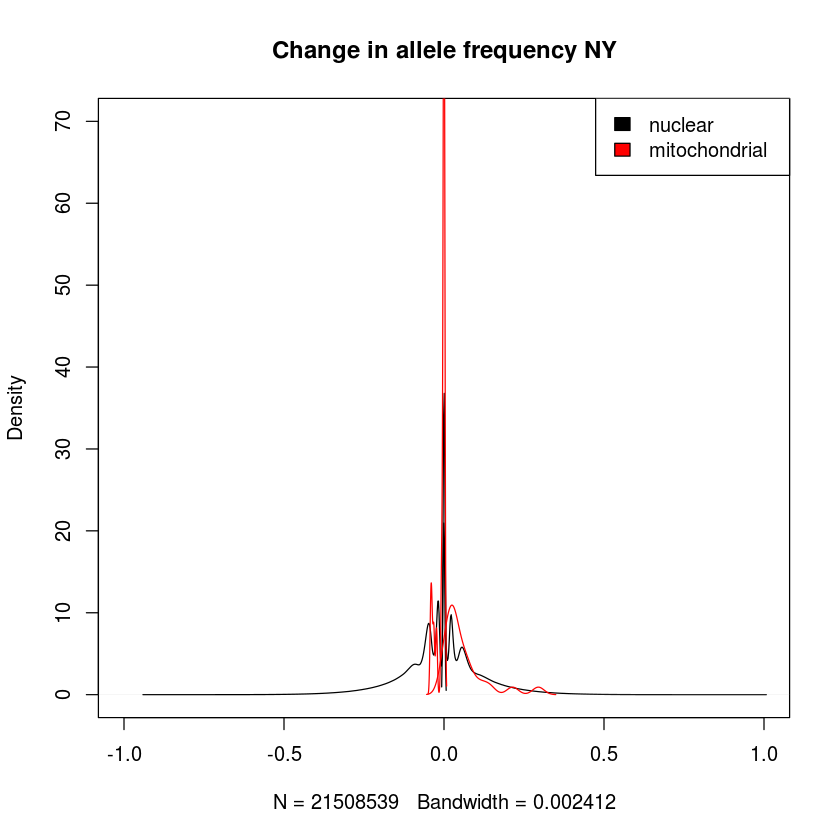

In [22]:
plot(density(nyeunuc$diff), main="Change in allele frequency NY", xlim=c(-1,1), ylim=c(0, 70))
    lines(density(nyeunucn$diff), col="black") 
    lines(density(AAPE02072785ny$diff), col="red") 
    lines(density(AAPE02072785nyn$diff), col="red") 
legend("topright", c("nuclear", "mitochondrial"), fill=c("black", "red"))

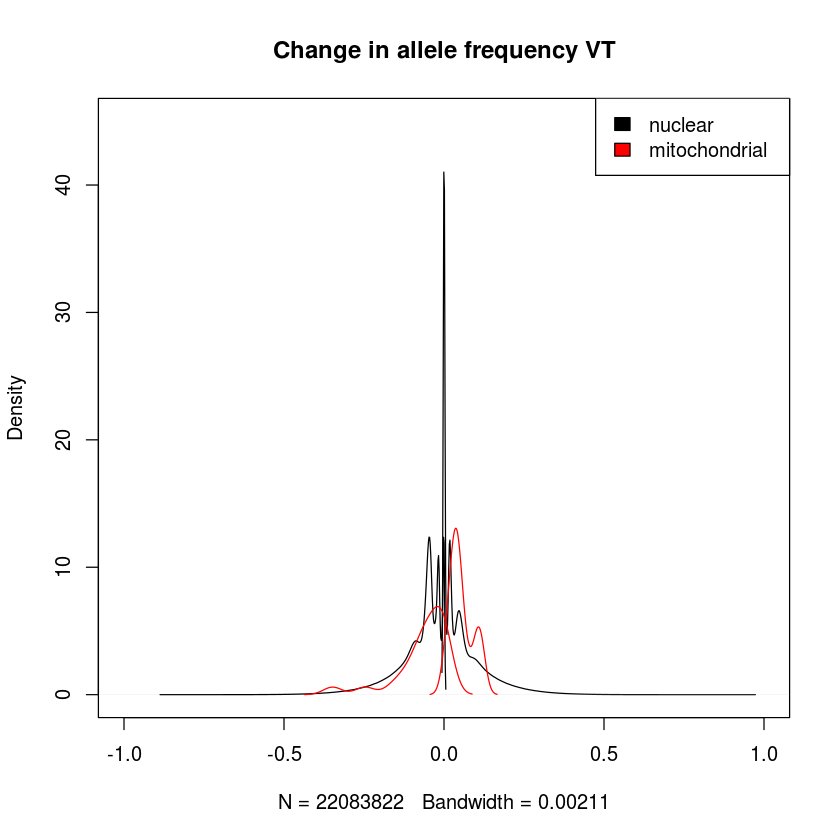

In [17]:
plot(density(vteunuc$diff), main="Change in allele frequency VT", xlim=c(-1,1), ylim=c(0, 45))
    lines(density(vteunucn$diff), col="black") 
    lines(density(AAPE02072785vt$diff), col="red") 
    lines(density(AAPE02072785vtn$diff), col="red") 
legend("topright", c("nuclear", "mitochondrial"), fill=c("black", "red"))

#  Actual change in MAF vs simulated change

I have tried simulations with multiple ne values, tryng to get better approximations of drift. 

I realized though some of this drift in the whole genome might be artifacts... So try filtering the actual change in maf.  



In [ ]:
NJ_f1f2BS_Ne424_370_296.csv

In [5]:
njsim=fread("~/WGS/SNPS/All_mylu/snps/NJ_f1f2BS_Ne424_370_296.csv")
nysim=fread("~/WGS/SNPS/All_mylu/snps/NY_f1f2BS_Ne424_370_296.csv")
#vtsim=fread("~/WGS/SNPS/All_mylu/snps/VT_f1f2BS_Ne424_370_296.csv")

Read 0.0% of 462000000 rows

Warning message in fread("~/WGS/SNPS/All_mylu/snps/NJ_f1f2BS_Ne424_370_296.csv"):
“C function strtod() returned ERANGE for one or more fields. The first was string input '7.25498733722823e-312'. It was read using (double)strtold() as numeric value 7.2549873372282341E-312 (displayed here using %.16E); loss of accuracy likely occurred. This message is designed to tell you exactly what has been done by fread's C code, so you can search yourself online for many references about double precision accuracy and these specific C functions. You may wish to use colClasses to read the column as character instead and then coerce that column using the Rmpfr package for greater accuracy.”

Read 462000000 rows and 4 (of 4) columns from 19.867 GB file in 00:19:48


Read 0.0% of 462000000 rows

Warning message in fread("~/WGS/SNPS/All_mylu/snps/NY_f1f2BS_Ne424_370_296.csv"):
“C function strtod() returned ERANGE for one or more fields. The first was string input '2.57958389816079e-312'. It was read using (double)strtold() as numeric value 2.5795838981607901E-312 (displayed here using %.16E); loss of accuracy likely occurred. This message is designed to tell you exactly what has been done by fread's C code, so you can search yourself online for many references about double precision accuracy and these specific C functions. You may wish to use colClasses to read the column as character instead and then coerce that column using the Rmpfr package for greater accuracy.”

Read 462000000 rows and 4 (of 4) columns from 20.371 GB file in 00:06:41


In [6]:
tail(njsim)

V1,f1,f2,SNP
92999995,0.147804,0.18147463,9441039
92999996,0.081544,0.05396381,9441039
92999997,0.079723,0.02240971,9441039
92999998,0.137857,0.02301429,9441039
92999999,0.000000,NA,9441039
93000000,0.095707,0.14475166,9441039


In [34]:
njsim2=fread("~/WGS/SNPS/All_mylu/snps/NJ_f1f2Ne100_80_40.csv")
nysim2=fread("~/WGS/SNPS/All_mylu/snps/NY_f1f2Ne100_80_40.csv")
vtsim2=fread("~/WGS/SNPS/All_mylu/snps/VT_f1f2Ne100_80_40.csv")

Read 93000000 rows and 4 (of 4) columns from 2.930 GB file in 00:01:22
Read 93000000 rows and 4 (of 4) columns from 2.985 GB file in 00:01:14
Read 93000000 rows and 4 (of 4) columns from 2.963 GB file in 00:01:17


In [6]:
njsim$diff=njsim$f2-njsim$f1
nysim$diff=nysim$f2-nysim$f1
#vtsim$diff=vtsim$f2-vtsim$f1

In [8]:
njsimNA=njsim[!is.na(njsim$f2),]

In [10]:
head(njsimNA)

V1,f1,f2,SNP,diff
1,0.316038,0.2363991,10265656,-0.07963886
2,0.399973,0.4758267,10265656,0.07585374
3,0.291674,0.4292322,10265656,0.13755820
4,0.557841,0.6805604,10265656,0.12271945
5,0.385794,0.5222330,10265656,0.13643899
6,0.469169,0.4555008,10265656,-0.01366818


In [11]:
NROW(njeusnpsAll)
NROW(njsim)

[1] 42925135

[1] 93000000

## How are sig snps in nj ny changing in VT?

In [52]:
mafsNJNY=read.csv("~/WGS/SNPS/All_mylu/snps/njnyeu50.csv", header=T, row.names=1)
comPvaluesChrNJNY50sig=read.csv("~/WGS/SNPS/All_mylu/snps/NJNY50_sigCompvaluesNe424_296.csv", row.names=1)

In [53]:
head(comPvaluesChrNJNY50sig)

Scaffold,NewScaf,SNP,Maj,Min,NJ,NY,Comp,rank,padjBH
GL429767,NW_005871048.1,16839644,T,A,0.000083999916,0.000181999818,0.000000290413319,70,0.00000053990960
GL429767,NW_005871048.1,38456248,T,C,0.000028999971,0.000823999176,0.000000443259322,78,0.00000060161356
GL429767,NW_005871048.1,22649683,T,A,0.000658999341,0.000000999999,0.000000014590428,20,0.00000015425989
GL429767,NW_005871048.1,46534125,C,T,0.000066999933,0.000000999999,0.000000001636561,9,0.00000006941695
GL429767,NW_005871048.1,51542832,G,A,0.000000999999,0.000233999766,0.000000005423103,13,0.00000010026893
GL429768,NW_005871049.1,3921142,G,C,0.000000999999,0.013839986160,0.000000264284027,67,0.00000051677062


In [54]:
length(unique(comPvaluesChrNJNY50sig$Scaffold))

[1] 76

In [55]:
colnames(comPvaluesChrNJNY50sig)=c("Scaffold", "NewScaf", "Position", "Major", "Minor", "NJ_Pval", "NY_Pval", "CombinedP", "rank", "BH")

In [56]:
mafsNJNY50Sig=merge(mafsNJNY, comPvaluesChrNJNY50sig, by=c("Scaffold", "Position", "Major", "Minor"))

In [ ]:
vteusnpsAll$V1=NULL
vteusnpsAll$Major.x=NULL
vteusnpsAll$Major.y=NULL
vteusnpsAll$Minor.x=NULL
vteusnpsAll$Minor.y=NULL

In [ ]:
head(vteusnpsAll)

In [ ]:
colnames(vteusnpsAll)=c("Scaffold", "Position", "Maf1_E.VT", "Maf2_E.VT", "Maf3_E.VT", "nInd_E.VT", "Maf1_U.VT", "Maf2_U.VT", "Maf3_U.VT", "nInd_U.VT", "diff.VT") 
head(vteusnpsAll)

In [65]:
mafsNJNY50SigVT=merge(mafsNJNY50Sig, vteusnpsAll, by=c("Scaffold", "Position"))

In [77]:
write.csv(mafsNJNY50SigVT, file="~/WGS/SNPS/All_mylu/snps/njnyeu50SigMafsVT.csv")

In [4]:
mafsNJNY50SigVT=read.csv("~/WGS/SNPS/All_mylu/snps/njnyeu50SigMafsVT.csv")

In [5]:
head(mafsNJNY50SigVT)

X,Scaffold,Position,Major,Minor,Maf1_E.NJ,Maf2_E.NJ,Maf3_E.NJ,nInd_E.NJ,Maf1_U.NJ,⋯,BH,Maf1_E.VT,Maf2_E.VT,Maf3_E.VT,nInd_E.VT,Maf1_U.VT,Maf2_U.VT,Maf3_U.VT,nInd_U.VT,diff.VT
1,GL429767,16839644,T,A,0.137273,0.047404,0.145505,10,0.665153,⋯,5.399096e-07,0.443794,0.443786,0.446321,16,0.433749,0.433736,0.443130,13,0.010050
2,GL429767,22649683,T,A,0.536439,0.536439,0.519259,14,0.063587,⋯,1.542599e-07,0.469791,0.469789,0.455652,22,0.499665,0.499657,0.503359,14,-0.029868
3,GL429767,38456248,T,C,0.714101,0.714099,0.741579,13,0.098380,⋯,6.016136e-07,0.491918,0.491917,0.465580,11,0.430303,0.430295,0.448661,15,0.061622
4,GL429767,46534125,C,T,0.140358,0.140358,0.159855,15,0.750253,⋯,6.941695e-08,0.466411,0.466402,0.469326,13,0.482726,0.482573,0.458982,8,-0.016171
5,GL429767,51542832,G,A,0.712276,0.712276,0.673153,15,0.065864,⋯,1.002689e-07,0.574318,0.574318,0.564231,11,0.397951,0.397954,0.407222,14,0.176364
6,GL429768,29962249,A,G,0.659928,0.659926,0.725762,15,0.108850,⋯,4.010757e-07,0.216655,0.216655,0.230230,15,0.418493,0.418489,0.426267,19,-0.201834


In [15]:
head(njeusnpsAll)

Scaffold,Position,Major.x,Minor.x,Maf1_E,Maf2_E,Maf3_E,nInd_E,Major.y,Minor.y,Maf1_U,Maf2_U,Maf3_U,nInd_U,diff
AAPE02055386,57060,T,C,0.000000,0.000005,0.000000,12,T,C,0.117731,0.032491,0.141014,9,-0.032486
AAPE02055386,67758,C,T,0.067869,0.022733,0.037396,10,C,T,0.100708,0.033446,0.071651,7,-0.010713
AAPE02055386,67765,C,T,0.000000,0.000003,0.000000,11,C,T,0.000000,0.000002,0.000000,6,0.000001
AAPE02055386,67766,G,A,0.062912,0.020990,0.038813,11,G,A,0.000000,0.000002,0.000000,7,0.020988
AAPE02055386,67785,G,A,0.000000,0.000002,0.000000,11,G,A,0.101246,0.033610,0.064823,7,-0.033608
AAPE02055386,67795,C,T,0.255406,0.255405,0.262683,12,C,T,0.343627,0.092649,0.340182,7,0.162756


density plot of starting and ending allele freeq

In [12]:
ifelse(mafsNJNY50SigVT$Maf2_U.NJ>0.5, 1-mafsNJNY50SigVT$Maf2_U.NJ, mafsNJNY50SigVT$Maf2_U.NJ)

[1] 0.334847 0.022033 0.034879 0.249749 0.022895 0.108154 0.202214 0.144416
 [9] 0.171475 0.023378 0.253520 0.404259 0.175135 0.000005 0.000002 0.487237
[17] 0.211460 0.081888 0.392482 0.245431 0.000002 0.000004 0.000004 0.192011
[25] 0.140198 0.071098 0.000005 0.418614 0.425159 0.259660 0.259561 0.150423
[33] 0.000002 0.214499 0.213124 0.142340 0.000004 0.221086 0.343852 0.174857
[41] 0.199441 0.037644 0.000004 0.061478 0.062162 0.000005 0.000003 0.331979
[49] 0.042643 0.021336 0.250470 0.397344 0.426904 0.284458 0.091183 0.435077
[57] 0.028438 0.000003 0.190521 0.224064 0.024734 0.070228 0.256993 0.190772
[65] 0.417138 0.072869 0.039969 0.041163 0.359555 0.327642 0.462095 0.152913
[73] 0.324946 0.270035 0.310096 0.026085 0.434785 0.000005 0.264887 0.215905
[81] 0.019261 0.029090 0.410769 0.036787 0.033917 0.158435 0.457520 0.000003
[89] 0.032950 0.292840 0.142128 0.029565

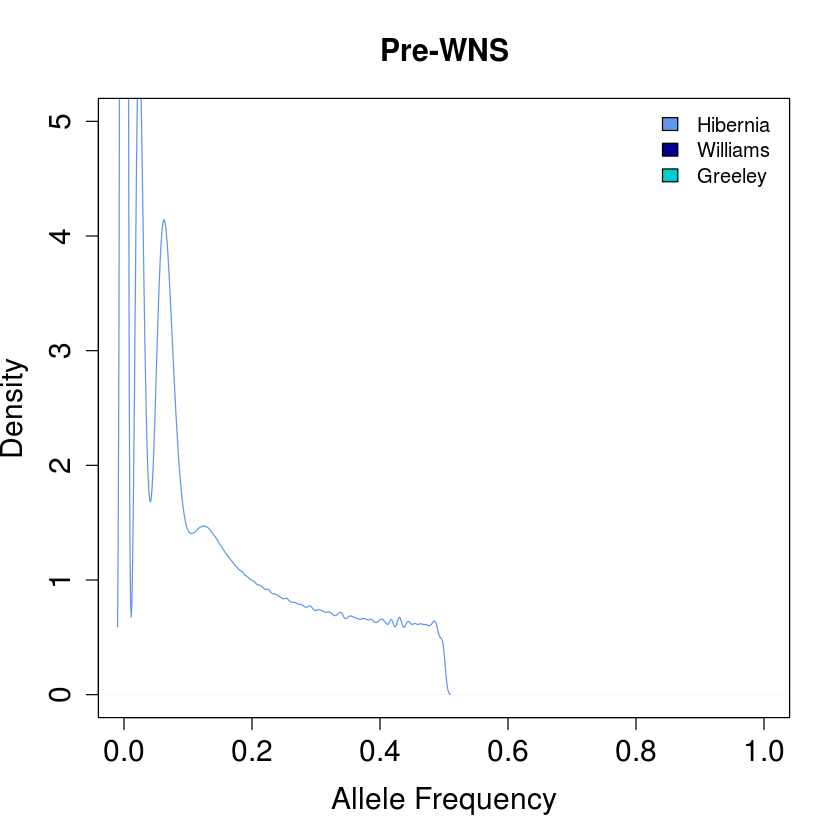

In [16]:
plot(density(ifelse(njeusnpsAll$Maf2_U>0.5, 1-njeusnpsAll$Maf2_U, njeusnpsAll$Maf2_U)), col="cornflowerblue", main="Pre-WNS", cex.main=1.5, xlab="Allele Frequency", cex.lab=1.5, cex.axis=1.5, xlim = c(-0,1), ylim=c(0,5))
legend("topright", c("Hibernia", "Williams", "Greeley"), fill=c("cornflowerblue", "darkblue", "cyan3"), bty="n")

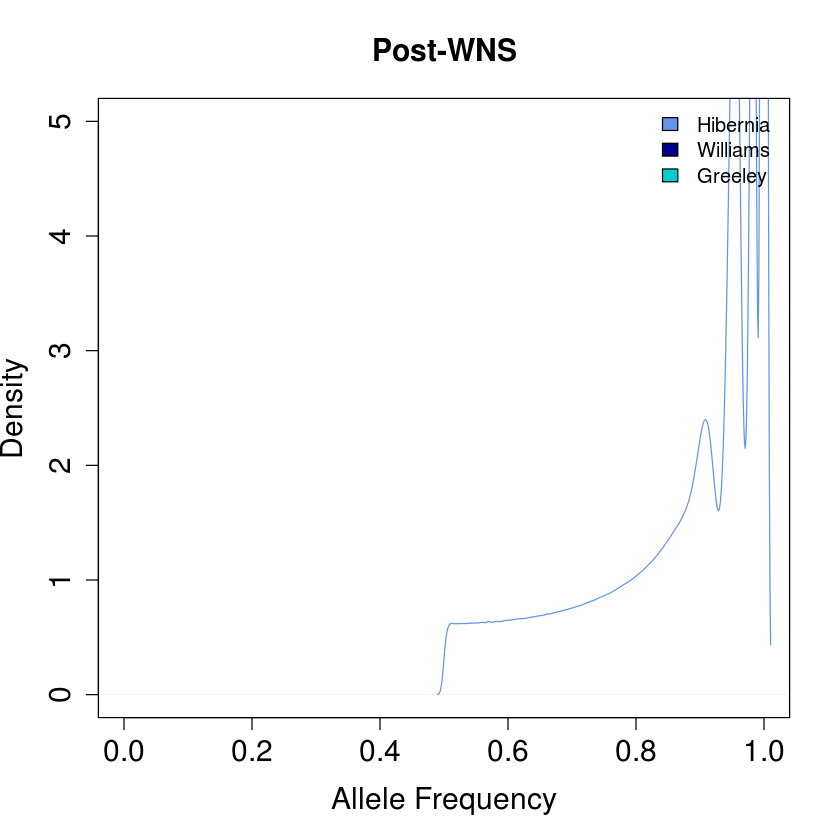

In [18]:
plot(density(ifelse(njeusnpsAll$Maf2_E<0.5, 1-njeusnpsAll$Maf2_E, njeusnpsAll$Maf2_E)), col="cornflowerblue", main="Post-WNS", cex.main=1.5, xlab="Allele Frequency", cex.lab=1.5, cex.axis=1.5, xlim = c(-0,1), ylim=c(0,5))
legend("topright", c("Hibernia", "Williams", "Greeley"), fill=c("cornflowerblue", "darkblue", "cyan3"), bty="n")

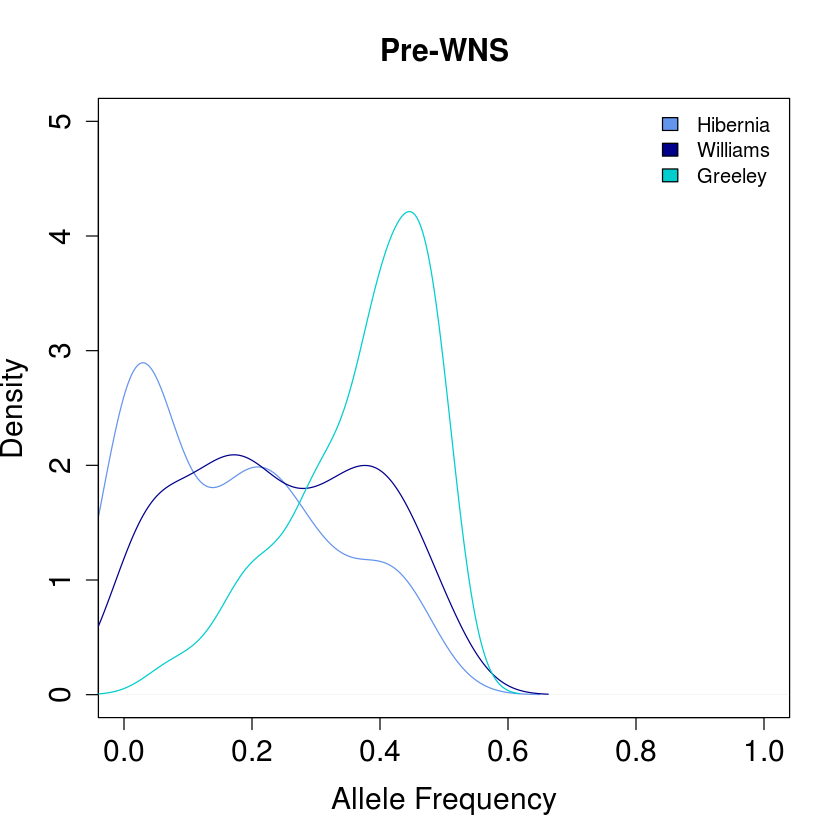

In [16]:
plot(density(ifelse(mafsNJNY50SigVT$Maf2_U.NJ>0.5, 1-mafsNJNY50SigVT$Maf2_U.NJ, mafsNJNY50SigVT$Maf2_U.NJ)), col="cornflowerblue", main="Pre-WNS", cex.main=1.5, xlab="Allele Frequency", cex.lab=1.5, cex.axis=1.5, xlim = c(-0,1), ylim=c(0,5))
lines(density(ifelse(mafsNJNY50SigVT$Maf2_U.NY>0.5, 1-mafsNJNY50SigVT$Maf2_U.NY, mafsNJNY50SigVT$Maf2_U.NY)), col="darkblue") 
lines(density(ifelse(mafsNJNY50SigVT$Maf2_U.VT>0.5, 1-mafsNJNY50SigVT$Maf2_U.VT, mafsNJNY50SigVT$Maf2_U.VT)), col="cyan3") 
legend("topright", c("Hibernia", "Williams", "Greeley"), fill=c("cornflowerblue", "darkblue", "cyan3"), bty="n")

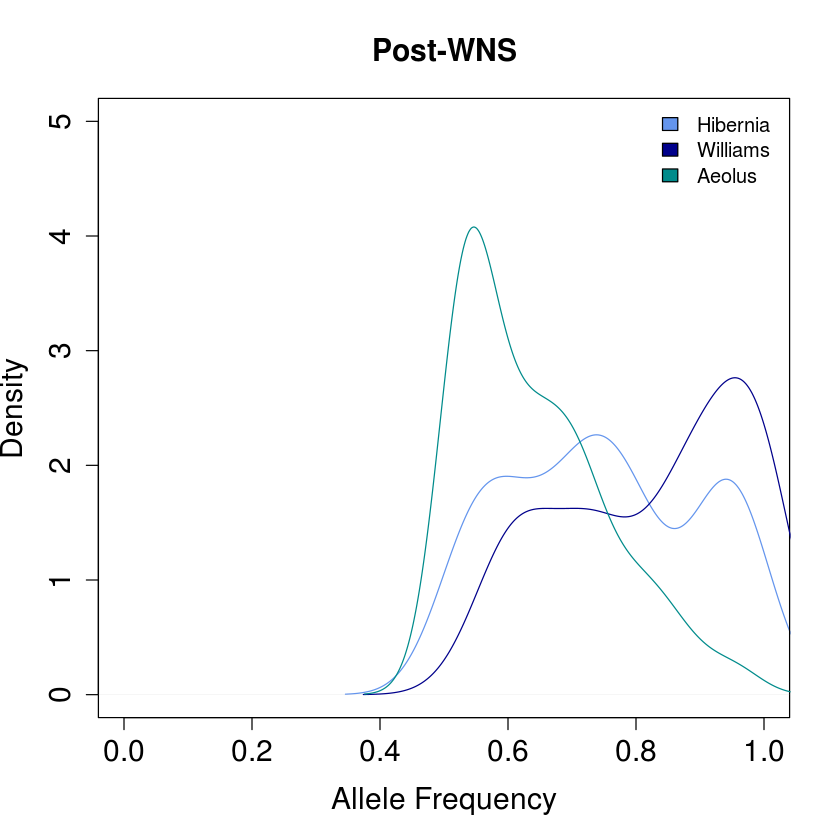

In [17]:
plot(density(ifelse(mafsNJNY50SigVT$Maf2_E.NJ<0.5, 1-mafsNJNY50SigVT$Maf2_E.NJ, mafsNJNY50SigVT$Maf2_E.NJ)), col="cornflowerblue", main="Post-WNS", cex.main=1.5, xlab="Allele Frequency", cex.lab=1.5, cex.axis=1.5, xlim = c(-0,1), ylim=c(0,5))
lines(density(ifelse(mafsNJNY50SigVT$Maf2_E.NY<0.5, 1-mafsNJNY50SigVT$Maf2_E.NY, mafsNJNY50SigVT$Maf2_E.NY)), col="darkblue") 
lines(density(ifelse(mafsNJNY50SigVT$Maf2_E.VT<0.5, 1-mafsNJNY50SigVT$Maf2_E.VT, mafsNJNY50SigVT$Maf2_E.VT)), col="darkcyan") 
legend("topright", c("Hibernia", "Williams", "Aeolus"), fill=c("cornflowerblue", "darkblue", "darkcyan"), bty="n")

In [ ]:
"darkcyan", "cyan3", "cornflowerblue", "darkblue"

In [3]:
mafsNJNY50SigVT$avNJNY=apply(X=cbind(mafsNJNY50SigVT$Maf2_E.NJ, mafsNJNY50SigVT$Maf2_E.NY), 1, FUN=mean)

In [9]:
abs(mafsNJNY50SigVT$avNJNY-mafsNJNY50SigVT$Maf2_E.VT)

[1] 0.3100640 0.2285375 0.1318995 0.3962220 0.1464555 0.4314525 0.2378520
 [8] 0.2568595 0.1033175 0.3884080 0.2895150 0.1978960 0.4467080 0.0220565
[15] 0.2586250 0.1017850 0.4066015 0.6480835 0.5340740 0.0934425 0.4448020
[22] 0.0446715 0.1615845 0.1680325 0.3260450 0.3177045 0.1647095 0.2707575
[29] 0.4990490 0.3641865 0.3685605 0.5158095 0.2832040 0.3300740 0.4111710
[36] 0.2632175 0.5423065 0.2433975 0.6880225 0.3298565 0.4784850 0.4987150
[43] 0.1977965 0.1251080 0.1684995 0.2917175 0.1537075 0.1952095 0.4478390
[50] 0.1173755 0.5914035 0.2488185 0.4870115 0.0551545 0.1847475 0.2195175
[57] 0.6123905 0.4666845 0.3153240 0.1801385 0.2914250 0.5557070 0.3696450
[64] 0.2168920 0.4476725 0.2919285 0.2787280 0.7459755 0.3987345 0.0125575
[71] 0.3267780 0.4864545 0.4211535 0.0721930 0.6127460 0.2862765 0.2668705
[78] 0.1566845 0.1915310 0.4413145 0.3099500 0.2822450 0.2386620 0.1142035
[85] 0.0759515 0.2301720 0.1777020 0.1949540 0.2665965 0.5073830 0.2452020
[92] 0.1339015

In [14]:
mafsNJNY50SigVT[abs(mafsNJNY50SigVT$avNJNY-mafsNJNY50SigVT$Maf2_E.VT)<.2& abs(mafsNJNY50SigVT$avNJNY-mafsNJNY50SigVT$Maf2_E.VT)>0.15,]

,X,Scaffold,Position,Major,Minor,Maf1_E.NJ,Maf2_E.NJ,Maf3_E.NJ,nInd_E.NJ,Maf1_U.NJ,⋯,Maf1_E.VT,Maf2_E.VT,Maf3_E.VT,nInd_E.VT,Maf1_U.VT,Maf2_U.VT,Maf3_U.VT,nInd_U.VT,diff.VT,avNJNY
12,12,GL429772,8716095,T,A,0.068201,0.021217,0.054064,9,0.596163,⋯,0.208508,0.208506,0.218485,14,0.432492,0.432494,0.426162,15,-0.223988,0.0106100
23,23,GL429795,3907289,G,A,0.515268,0.515268,0.478842,9,0.000000,⋯,0.464040,0.464039,0.427429,15,0.178136,0.178136,0.188822,14,0.285903,0.6256235
24,24,GL429801,6986210,A,T,0.783029,0.783026,0.808951,16,0.192008,⋯,0.528386,0.528386,0.524618,20,0.490614,0.490612,0.491786,14,0.037774,0.6964185
27,27,GL429819,365354,G,A,0.511295,0.511297,0.510407,13,0.000000,⋯,0.459926,0.459913,0.465448,17,0.426831,0.426831,0.400215,13,0.033082,0.6246225
43,43,GL429861,3065399,A,G,0.573445,0.573441,0.586570,13,0.000000,⋯,0.403306,0.403296,0.411588,14,0.483136,0.483136,0.449388,12,-0.079840,0.6010925
45,45,GL429861,4317523,T,C,0.621081,0.621073,0.624336,15,0.241259,⋯,0.456438,0.456439,0.422066,13,0.264624,0.264624,0.270439,12,0.191815,0.6249385
47,47,GL429873,2056629,T,A,0.371091,0.371093,0.387491,13,1.000004,⋯,0.367880,0.367884,0.369602,11,0.471649,0.471641,0.477832,15,-0.103757,0.2141765
48,48,GL429879,384336,G,A,0.102340,0.102339,0.112219,14,0.668032,⋯,0.272225,0.271775,0.282173,14,0.191546,0.191546,0.193632,13,0.080229,0.0765655
55,55,GL429910,2414078,A,C,0.647307,0.647299,0.648064,14,0.091366,⋯,0.449287,0.449272,0.449900,13,0.626906,0.626903,0.623197,9,-0.177631,0.6340195
60,60,GL429946,1039079,T,A,0.735810,0.735806,0.766927,14,0.224259,⋯,0.479478,0.479470,0.482724,13,0.470160,0.470154,0.527251,15,0.009316,0.6596085


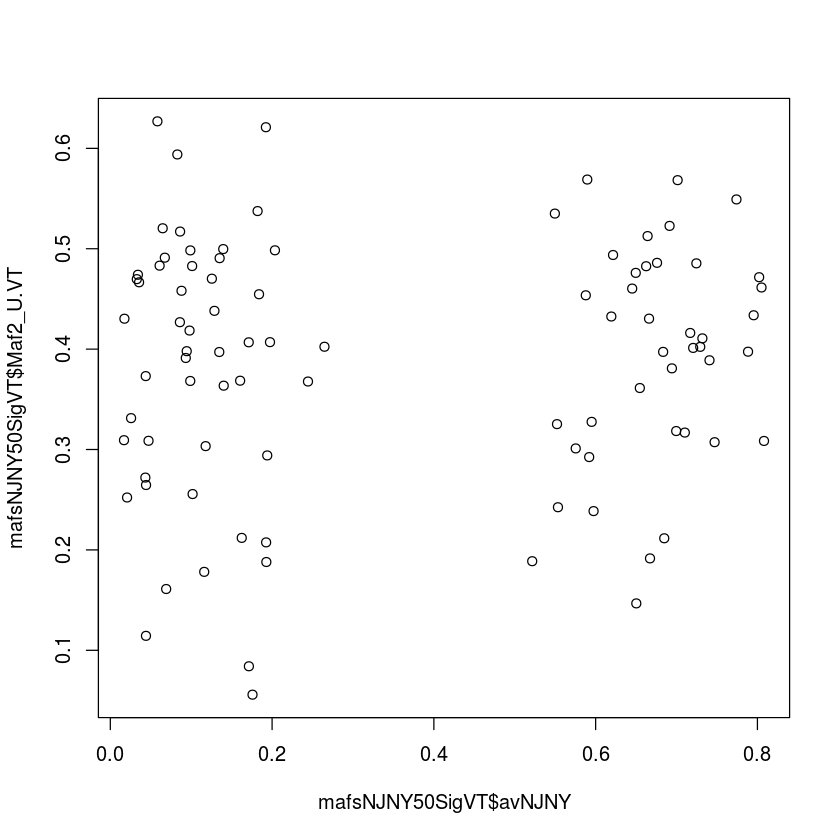

In [63]:
plot(mafsNJNY50SigVT$avNJNY, mafsNJNY50SigVT$Maf2_U.VT)

## check outliers

In [3]:
mafsNJNY50SigVT$diff.VT

[1]  0.010050 -0.029868  0.061622 -0.016171  0.176364 -0.201834  0.163729
 [8] -0.006873 -0.052330 -0.133983 -0.004424 -0.223988  0.033720  0.284503
[15]  0.201256 -0.074087 -0.029366 -0.324567  0.265139 -0.090022 -0.343807
[22]  0.151573  0.285903  0.037774 -0.098244 -0.179065  0.033082  0.007247
[29]  0.172251  0.092713 -0.061623 -0.278126  0.099816 -0.089229  0.291863
[36]  0.402920  0.181282  0.267676  0.261931 -0.056598  0.312720 -0.050923
[43] -0.079840  0.207325  0.191815 -0.091401 -0.103757  0.080229 -0.065172
[50] -0.062642 -0.185709 -0.037469  0.019429 -0.305905 -0.177631 -0.028940
[57] -0.219313 -0.322878 -0.139413  0.009316 -0.065563 -0.335662 -0.022314
[64] -0.038617 -0.103922  0.092982 -0.014690 -0.362803  0.056708 -0.243488
[71]  0.146637 -0.064558  0.240994 -0.101806  0.319320  0.089899 -0.251337
[78] -0.044125 -0.050314  0.042155 -0.125597  0.312054 -0.181189  0.095672
[85]  0.355549 -0.158372 -0.032394  0.107160  0.053252  0.069798  0.145424
[92]  0.396375

In [9]:
colnames(vtout)=c("Scaffold", "Position", "Major", "Minor", "Maf1_UOutVT", "Maf2_UOutVT", "Maf3_UOutVT", "nInd_UOutVT")
colnames(nyout)=c("Scaffold", "Position", "Major", "Minor", "Maf1_UOutNY", "Maf2_UOutNY", "Maf3_UOutNY", "nInd_UOutNY")

In [12]:
out=merge(vtout, nyout, by=c("Scaffold", "Position"))

In [13]:
mafsNJNY50SigVTout=merge(mafsNJNY50SigVT, out, by=c("Scaffold", "Position"))

In [38]:
print(mafsNJNY50SigVTout[abs(mafsNJNY50SigVTout$Maf2_U.VT-mafsNJNY50SigVTout$Maf2_UOutVT)>0.07,])

   Scaffold Position  X Major Minor Maf1_E.NJ Maf2_E.NJ Maf3_E.NJ nInd_E.NJ
26 GL429816  3229647 26     G     A  0.612853  0.612852  0.605200        12
33 GL429841   612532 33     G     A  0.509017  0.509011  0.509824        11
38 GL429852   463102 38     T     G  0.745640  0.745643  0.711000        15
55 GL429910  2414078 55     A     C  0.647307  0.647299  0.648064        14
63 GL429955  1484586 63     G     A  0.203603  0.203610  0.188253        13
83 GL430281   514067 83     T     C  0.071338  0.023731  0.066022        10
   Maf1_U.NJ Maf2_U.NJ Maf3_U.NJ nInd_U.NJ   diff.NJ nInd_NJ Maf1_E.NY
26  0.238570  0.071098  0.258777         8  0.541754       4  0.597583
33  0.000000  0.000002  0.000000        10  0.509009       1  0.768312
38  0.221078  0.221086  0.177977        13  0.524557       2  0.691506
55  0.091366  0.091183  0.095190         9  0.556116       5  0.620739
63  0.743008  0.743007  0.727728         9 -0.539397       4  0.000000
83  0.589231  0.589231  0.552267        11

In [33]:
print(mafsNJNY50SigVTout[abs(mafsNJNY50SigVTout$Maf2_U.NY-mafsNJNY50SigVTout$Maf2_UOutNY)>0.1,])

   Scaffold Position  X Major Minor Maf1_E.NJ Maf2_E.NJ Maf3_E.NJ nInd_E.NJ
10 GL429770  8507307 10     A     C  0.726631  0.726628  0.769446        14
16 GL429781  7594948 16     A     T  0.172821  0.000035  0.150637        14
52 GL429891   266596 52     T     A  0.225892  0.078006  0.246746        10
64 GL429962   689293 64     A     C  0.211489  0.211486  0.261451        15
69 GL429998    99324 69     C     G  0.247803  0.072816  0.291306        12
   Maf1_U.NJ Maf2_U.NJ Maf3_U.NJ nInd_U.NJ   diff.NJ nInd_NJ Maf1_E.NY
10  0.058694  0.023378  0.062550        13  0.703250       1  0.778908
16  0.512764  0.512763  0.493085        16 -0.512728       2  0.125532
52  0.602794  0.602656  0.608913         7 -0.524650       3  0.000000
64  0.809236  0.809228  0.837358        11 -0.597742       4  0.000000
69  0.640445  0.640445  0.635406        11 -0.567629       1  0.142613
   Maf2_E.NY Maf3_E.NY nInd_E.NY Maf1_U.NY Maf2_U.NY Maf3_U.NY nInd_U.NY
10  0.778908  0.775551        11  0.174494  0

GL429891   266596 is only snp that wouldnt be above 0.5 if removed outliers. 

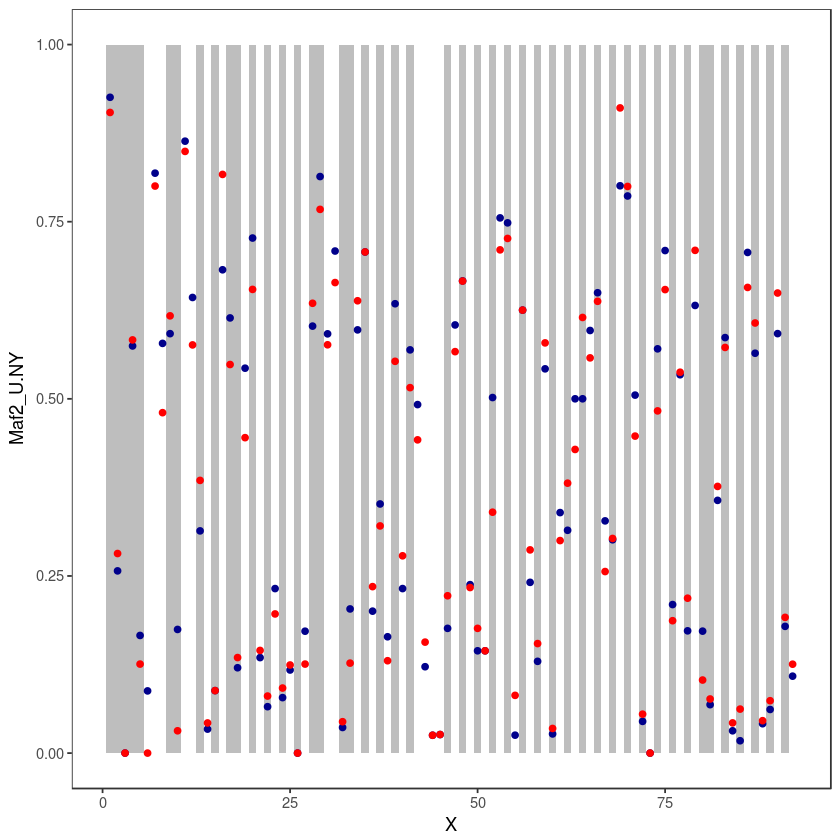

In [29]:
print(ggplot()+ geom_rect(data=mafsNJNY50SigVTout, (aes(xmin=X-0.5, xmax=X+0.5, 
ymin=0, ymax=1, fill=factor(Scaffold)))) +
scale_fill_manual(values=rep(c("grey", "white"), 38), guide=FALSE)
      + geom_point(data=mafsNJNY50SigVTout, aes(x=X, y=Maf2_U.NY), colour="darkblue")+ theme_bw()
    + theme( panel.grid.minor = element_blank(), panel.grid.major = element_blank())
    +  geom_point(data=mafsNJNY50SigVTout, aes(x=X, y=Maf2_UOutNY), colour="red")
     + ylim(0, 1)
     )

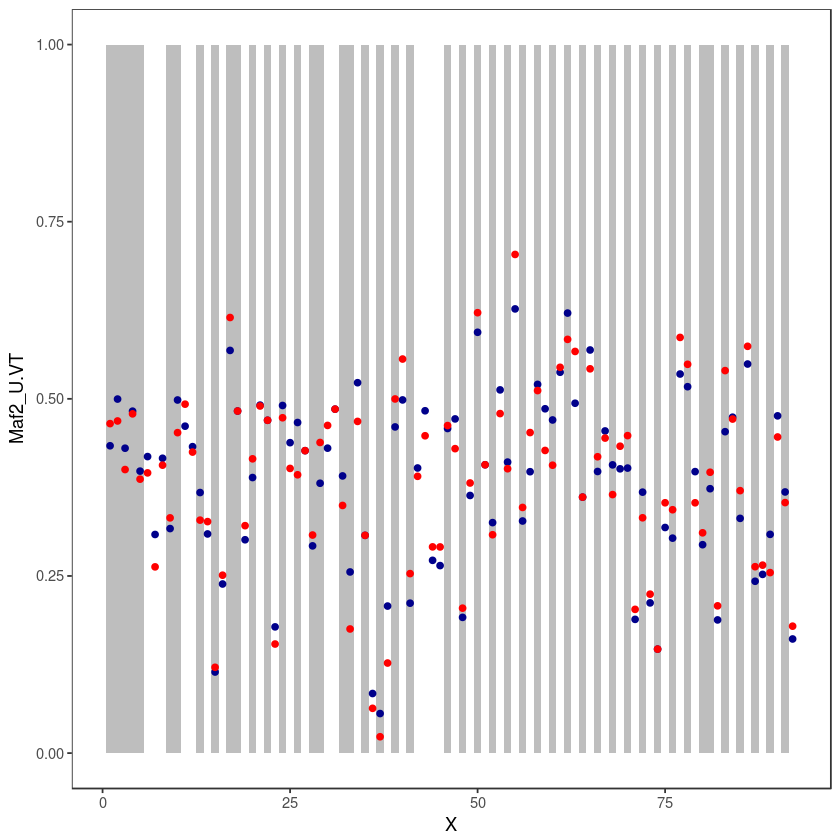

In [35]:
print(ggplot()+ geom_rect(data=mafsNJNY50SigVTout, (aes(xmin=X-0.5, xmax=X+0.5, 
ymin=0, ymax=1, fill=factor(Scaffold)))) +
scale_fill_manual(values=rep(c("grey", "white"), 38), guide=FALSE)
      + geom_point(data=mafsNJNY50SigVTout, aes(x=X, y=Maf2_U.VT), colour="darkblue")+ theme_bw()
    + theme( panel.grid.minor = element_blank(), panel.grid.major = element_blank())
    +  geom_point(data=mafsNJNY50SigVTout, aes(x=X, y=Maf2_UOutVT), colour="red")
     + ylim(0, 1)
     )

In [3]:
colnames(mafsNJNY50SigVT)

[1] "X"         "Scaffold"  "Position"  "Major"     "Minor"     "Maf1_E.NJ"
 [7] "Maf2_E.NJ" "Maf3_E.NJ" "nInd_E.NJ" "Maf1_U.NJ" "Maf2_U.NJ" "Maf3_U.NJ"
[13] "nInd_U.NJ" "diff.NJ"   "nInd_NJ"   "Maf1_E.NY" "Maf2_E.NY" "Maf3_E.NY"
[19] "nInd_E.NY" "Maf1_U.NY" "Maf2_U.NY" "Maf3_U.NY" "nInd_U.NY" "diff.NY"  
[25] "nInd.NY"   "NewScaf"   "NJ_Pval"   "NY_Pval"   "CombinedP" "rank"     
[31] "BH"        "Maf1_E.VT" "Maf2_E.VT" "Maf3_E.VT" "nInd_E.VT" "Maf1_U.VT"
[37] "Maf2_U.VT" "Maf3_U.VT" "nInd_U.VT" "diff.VT"

In [4]:
mafsNJNY50SigVT$logP=(-log(mafsNJNY50SigVT$CombinedP))

In [5]:
head(mafsNJNY50SigVT$Maf1_E.NJ, 10)

[1] 0.137273 0.536439 0.714101 0.140358 0.712276 0.659928 0.285655 0.241852
 [9] 0.279313 0.726631

In [43]:
mafsNJNY50SigVT$VTstar=ifelse(mafsNJNY50SigVT$diff.NJ>0.5, ifelse(
    pmax(mafsNJNY50SigVT$Maf2_E.NJ, mafsNJNY50SigVT$Maf2_E.NY)-mafsNJNY50SigVT$Maf2_E.VT>pmax(mafsNJNY50SigVT$Maf2_E.NJ, mafsNJNY50SigVT$Maf2_E.NY)/2, "NO", "YES"
), ifelse(
    mafsNJNY50SigVT$Maf2_E.VT-pmin(mafsNJNY50SigVT$Maf2_E.NJ, mafsNJNY50SigVT$Maf2_E.NY)>(1-pmin(mafsNJNY50SigVT$Maf2_E.NJ, mafsNJNY50SigVT$Maf2_E.NY))/2, "NO", "YES"
))

In [49]:
table(mafsNJNY50SigVT$VTstar)


 NO YES 
 29  63 

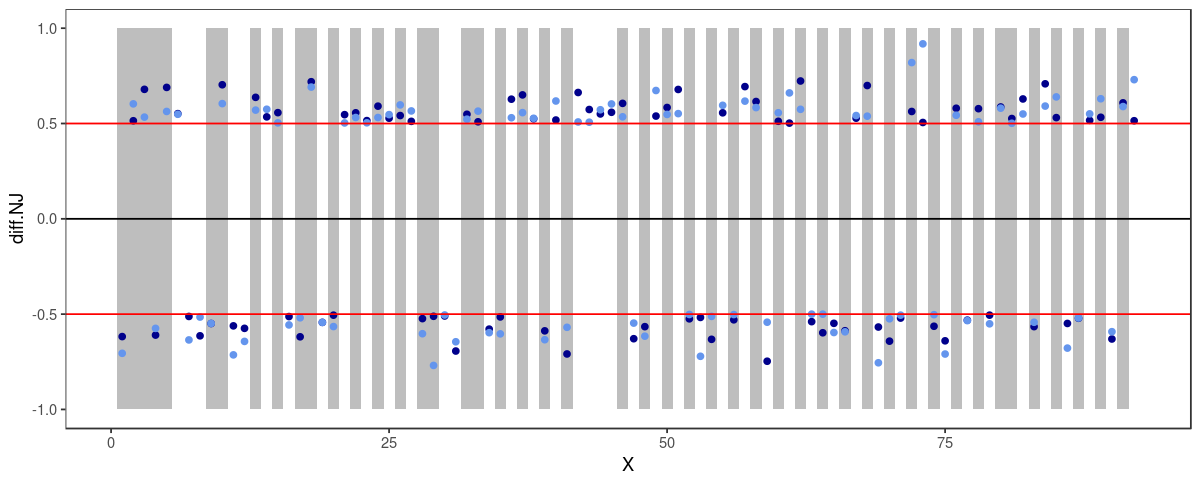

In [66]:
options(repr.plot.width=10, repr.plot.height=4)

print(ggplot()+geom_rect(data=mafsNJNY50SigVT, (aes(xmin=X-0.5, xmax=X+0.5, 
ymin=-1, ymax=1, fill=factor(Scaffold)))) +
scale_fill_manual(values=rep(c("grey", "white"), 38), guide=FALSE)
      + geom_point(data=mafsNJNY50SigVT, aes(x=X, y=diff.NJ), colour="darkblue")+ theme_bw()
    + theme( panel.grid.minor = element_blank(), panel.grid.major = element_blank())
    + geom_point(data=mafsNJNY50SigVT, aes(x=X, y=diff.NY), colour="cornflowerblue")
     + ylim(-1, 1)
      +geom_hline(yintercept = c(0, 0.5, -0.5), col=c("black", "red", "red"))
     )


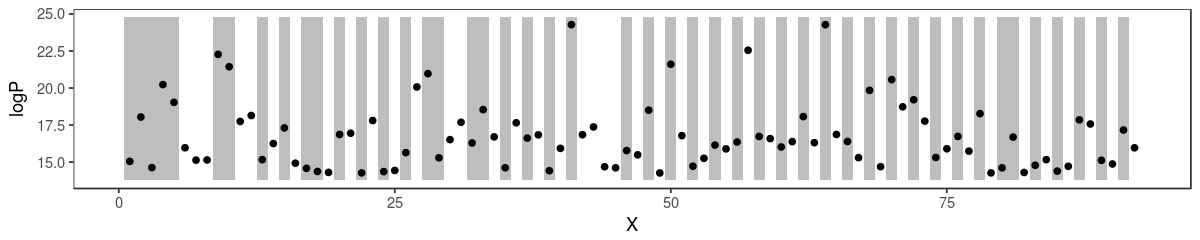

In [56]:
options(repr.plot.width=10, repr.plot.height=2)

print(ggplot() +geom_rect(data=mafsNJNY50SigVT, (aes(xmin=X-0.5, xmax=X+0.5, 
ymin=min(logP-0.5), ymax=max(logP+0.5), fill=factor(Scaffold)))) +
scale_fill_manual(values=rep(c("grey", "white"), 38), guide=FALSE)
          + geom_point(data=mafsNJNY50SigVT, aes(x=X, y=logP))+ theme_bw()
    + theme( panel.grid.minor = element_blank(), panel.grid.major = element_blank()))

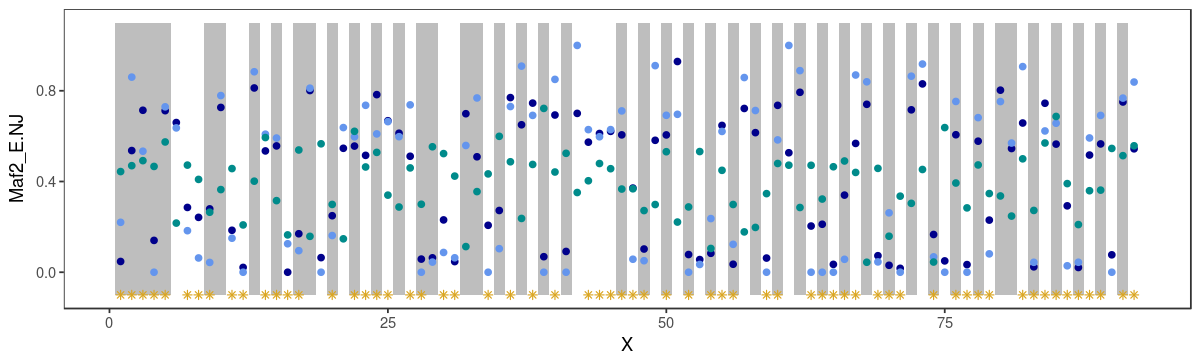

In [64]:
options(repr.plot.width=10, repr.plot.height=3)
print(ggplot()+geom_rect(data=mafsNJNY50SigVT, (aes(xmin=X-0.5, xmax=X+0.5, 
ymin=-.1, ymax=1.1, fill=factor(Scaffold)))) +
scale_fill_manual(values=rep(c("grey", "white"), 38), guide=FALSE)
      + geom_point(data=mafsNJNY50SigVT, aes(x=X, y=Maf2_E.NJ), colour="darkblue")+ theme_bw()
    + theme( panel.grid.minor = element_blank(), panel.grid.major = element_blank())
    + geom_point(data=mafsNJNY50SigVT, aes(x=X, y=Maf2_E.NY), colour="cornflowerblue")
       + geom_point(data=mafsNJNY50SigVT, aes(x=X, y=Maf2_E.VT), colour="darkcyan")
      +geom_point(data=mafsNJNY50SigVT[mafsNJNY50SigVT$VTstar=="YES",], aes(x=X, shape=VTstar), y=-.1, color="goldenrod")
      +scale_shape_manual(values=8)
      + theme(legend.position="none")
     + ylim(-.1, 1.1)
     )

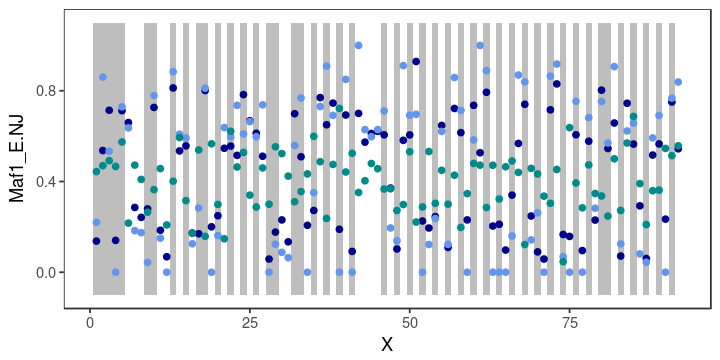

In [50]:
options(repr.plot.width=6, repr.plot.height=3)
print(ggplot()+geom_rect(data=mafsNJNY50SigVT, (aes(xmin=X-0.5, xmax=X+0.5, 
ymin=-.1, ymax=1.1, fill=factor(Scaffold)))) +
scale_fill_manual(values=rep(c("grey", "white"), 38), guide=FALSE)
      + geom_point(data=mafsNJNY50SigVT, aes(x=X, y=Maf1_E.NJ), colour="darkblue")+ theme_bw()
    + theme( panel.grid.minor = element_blank(), panel.grid.major = element_blank())
    + geom_point(data=mafsNJNY50SigVT, aes(x=X, y=Maf1_E.NY), colour="cornflowerblue")
       + geom_point(data=mafsNJNY50SigVT, aes(x=X, y=Maf1_E.VT), colour="darkcyan")
     + ylim(-.1, 1.1)
     )

## can i plot all the snps with sig ones highlighted?

In [22]:
write.csv(njnyeusnpAll, file="~/WGS/SNPS/All_mylu/snps/njnyeu50Allsnps.csv")

In [2]:
njnyeusnpAll=fread("~/WGS/SNPS/All_mylu/snps/njnyeu50Allsnps.csv")

Read 40952833 rows and 32 (of 32) columns from 7.857 GB file in 00:05:25


In [3]:
head(njnyeusnpAll)

V1,Scaffold,Position,V1.x,Major.x.x,Minor.x.x,Maf1_E.x,Maf2_E.x,Maf3_E.x,nInd_E.x,⋯,Maf3_E.y,nInd_E.y,Major.y.y,Minor.y.y,Maf1_U.y,Maf2_U.y,Maf3_U.y,nInd_U.y,diff.y,avdiffnjny
1,AAPE02055386,57060,1,T,C,0.000000,0.000005,0.000000,12,⋯,0.000000,11,T,C,0.000000,0.000005,0.000000,12,0.000001,-0.0162425
2,AAPE02055386,67758,2,C,T,0.067869,0.022733,0.037396,10,⋯,0.000000,10,C,T,0.043370,0.043371,0.061623,19,-0.043368,-0.0270405
3,AAPE02055386,67765,1,C,T,0.000000,0.000003,0.000000,11,⋯,0.000000,11,C,T,0.038368,0.037756,0.041336,19,-0.037752,-0.0188755
4,AAPE02055386,67766,2,G,A,0.062912,0.020990,0.038813,11,⋯,0.000000,10,G,A,0.037757,0.012754,0.040748,19,-0.012751,0.0041185
5,AAPE02055386,67785,3,G,A,0.000000,0.000002,0.000000,11,⋯,0.000000,11,G,A,0.000000,0.000002,0.000000,18,0.000002,-0.0168030
6,AAPE02055386,67795,3,C,T,0.255406,0.255405,0.262683,12,⋯,0.204537,11,C,T,0.273954,0.273961,0.232749,18,-0.068610,0.0470730


In [32]:
comPvaluesChrNJNY50sig=fread("~/WGS/SNPS/All_mylu/snps/NJNY50_sigCompvaluesNe424_296.csv")

In [7]:
allsnps=as.data.frame(cbind(njnyeusnpAll$Scaffold, njnyeusnpAll$Position, njnyeusnpAll$avdiffnjny))

In [13]:
head(comPvaluesChrNJNY50sig)

Scaffold,NewScaf,SNP,Maj,Min,NJ,NY,Comp,rank,padjBH
GL429767,NW_005871048.1,16839644,T,A,8.399992e-05,1.819998e-04,2.904133e-07,70,5.399096e-07
GL429767,NW_005871048.1,38456248,T,C,2.899997e-05,8.239992e-04,4.432593e-07,78,6.016136e-07
GL429767,NW_005871048.1,22649683,T,A,6.589993e-04,9.999990e-07,1.459043e-08,20,1.542599e-07
GL429767,NW_005871048.1,46534125,C,T,6.699993e-05,9.999990e-07,1.636561e-09,9,6.941695e-08
GL429767,NW_005871048.1,51542832,G,A,9.999990e-07,2.339998e-04,5.423103e-09,13,1.002689e-07
GL429768,NW_005871049.1,3921142,G,C,9.999990e-07,1.383999e-02,2.642840e-07,67,5.167706e-07


In [33]:
SNPs=as.data.frame(cbind(as.character(comPvaluesChrNJNY50sig$Scaffold), comPvaluesChrNJNY50sig$SNP))

In [34]:
SNPs$SNP=1

In [35]:
colnames(SNPs)=c("Scaf", "BP", "SNP")

In [26]:
colnames(allsnps)=c("Scaf", "BP", "P")
allsnps$CHR=as.numeric(allsnps$Scaf)

In [47]:
allsnpshi=merge(allsnps, SNPs, by=c("Scaf", "BP"), all.x=TRUE)

In [48]:
allsnpshiscaf=allsnpshi[allsnpshi$Scaf %in% SNPs$Scaf,]

In [36]:
NROW(allsnpshiscaf)

[1] 12316782

In [49]:
allsnpshi$BP=as.numeric(as.character(allsnpshi$BP))
allsnpshiscaf$BP=as.numeric(as.character(allsnpshiscaf$BP))

In [50]:
allsnpshi$P=as.numeric(as.character(allsnpshi$P))
allsnpshiscaf$P=as.numeric(as.character(allsnpshiscaf$P))

In [53]:
colnames(allsnpshi)=c("Scaf", "BP", "P", "Delete", "CHR", "SNP")

In [56]:
colnames(allsnpshiscaf)

[1] "Scaf" "BP"   "P"    NA     "CHR"  "SNP"

In [57]:
colnames(allsnpshiscaf)=c("Scaf", "BP", "P", "Delete", "CHR", "SNP")

In [60]:
allsnpshi$Scaf=NULL
allsnpshi$Delete=NULL
allsnpshiscaf$Scaf=NULL
allsnpshiscaf$Delete=NULL
rownames(allsnpshiscaf)=NULL
head(allsnpshiscaf)

BP,P,CHR,SNP
10000007,0.0173340,2158,NA
10000011,-0.0510670,2158,NA
10000145,-0.0842490,2158,NA
10000152,0.1351255,2158,NA
10000176,0.2020980,2158,NA
10000188,-0.0504265,2158,NA


In [76]:
allsnpshiscaf$CHR=as.numeric(as.factor(allsnpshiscaf$CHR))

In [77]:
tail(allsnpshiscaf)

,BP,P,CHR,SNP,CHR2
12316777,9878,0.0229470,76,NA,76
12316778,9893,0.0212840,76,NA,76
12316779,9900,0.1885875,76,NA,76
12316780,9904,0.0123410,76,NA,76
12316781,9937,-0.0312480,76,NA,76
12316782,9998,-0.0436680,76,NA,76


In [61]:
write.csv(allsnpshi, file="~/WGS/SNPS/All_mylu/snps/njnyeu50AllsnpsMan.csv")

In [78]:
write.csv(allsnpshiscaf, file="~/WGS/SNPS/All_mylu/snps/njnyeu50SigsnpsMan.csv")

In [6]:
allsnpshiscaf=fread("~/WGS/SNPS/All_mylu/snps/njnyeu50SigsnpsMan.csv")

Read 12316782 rows and 6 (of 6) columns from 0.417 GB file in 00:00:27


In [ ]:
jpeg('~/WGS/SNPS/All_mylu/snps/NJNY_50_sigsnps.jpg')
manhattan(allsnpshiscaf, ylim=c(-1,1), logp=FALSE, highlight = ofinterest)
dev.off()

In [7]:
ofinterest=c(1)

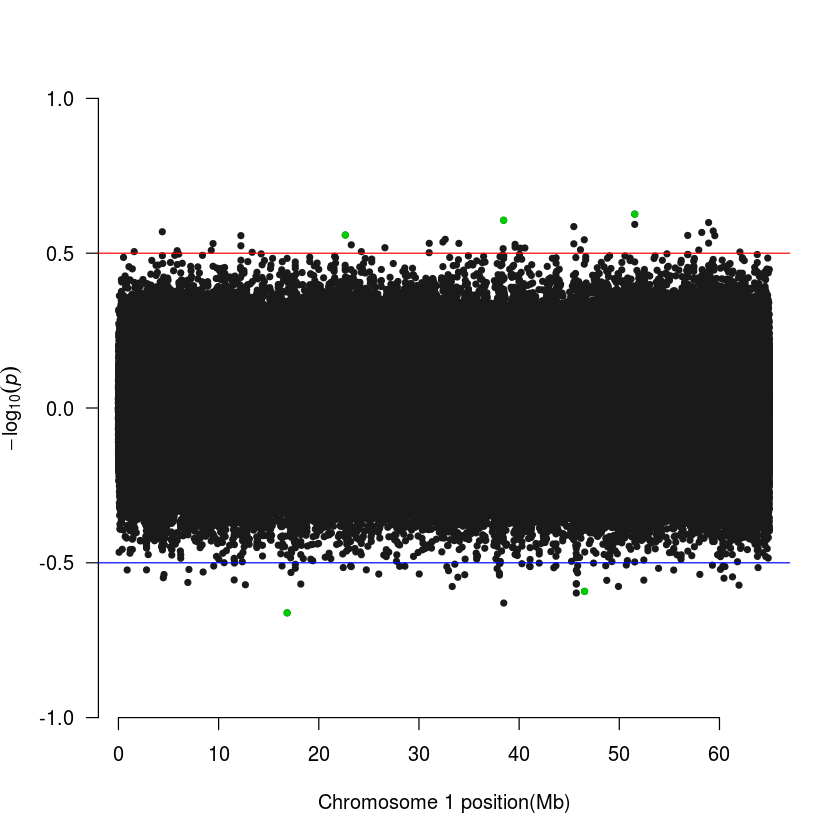

In [14]:
manhattan(subset(allsnpshiscaf, CHR == 1), ylim=c(-1,1), logp=FALSE, highlight = ofinterest, genomewideline = 0.5, suggestiveline=(-0.5))

In [2]:
library("IRdisplay")

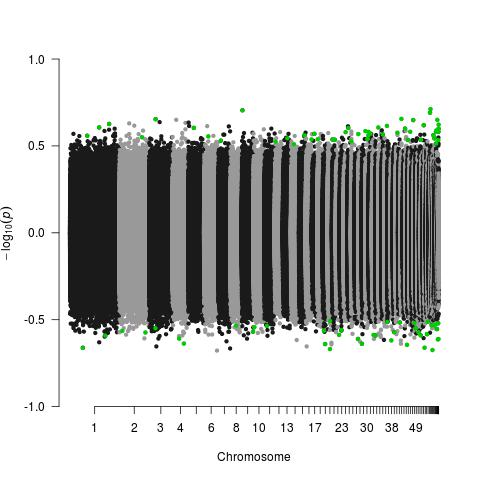

In [4]:
display_jpeg(file="~/WGS/SNPS/All_mylu/snps/NJNY_50_sigsnps.jpg")  

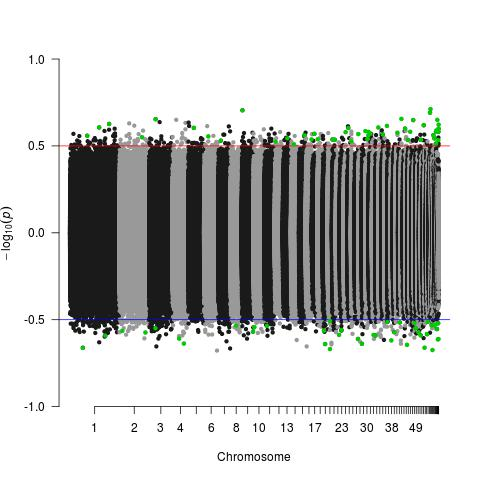

In [51]:
display_jpeg(file="~/WGS/SNPS/All_mylu/snps/NJNY_50_sigsnps_line.jpg")  

In [15]:
comPvaluesChrNJNY50=read.csv("~/WGS/SNPS/All_mylu/snps/NJNY50_comPvaluesNe424_296.csv", row.names=1)

In [16]:
head(comPvaluesChrNJNY50)

,SNP,Scaffold,Maj,Min,NJ,NY,Comp,rank,padjBH
69,300331,GL429859,T,C,0.000000999999,0.000000999999,0.00000000002863097,1,0.000000007712994
136,689293,GL429962,A,C,0.000000999999,0.000000999999,0.00000000002863097,2,0.000000015425989
185,1241213,GL429927,A,G,0.000000999999,0.000005999994,0.00000000016103526,3,0.000000023138983
392,8292792,GL429770,A,T,0.000007999992,0.000000999999,0.00000000021241223,4,0.000000030851977
235,2043530,GL429885,T,C,0.000000999999,0.000015999984,0.00000000041373412,5,0.000000038564972
395,8507307,GL429770,A,C,0.000000999999,0.000018999981,0.00000000048804412,6,0.000000046277966


In [19]:
allpvals=as.data.frame(cbind(as.character(comPvaluesChrNJNY50$Scaffold), comPvaluesChrNJNY50$SNP, comPvaluesChrNJNY50$Comp))

In [21]:
colnames(allpvals)=c("Scaf", "BP", "P")

In [22]:
allpvals$CHR=as.numeric(allpvals$Scaf)

In [38]:
head(comPvaluesChrNJNY50sig)

V1,Scaffold,NewScaf,SNP,Maj,Min,NJ,NY,Comp,rank,padjBH
1,GL429767,NW_005871048.1,16839644,T,A,0.000083999916,0.000181999818,0.000000290413319,70,0.00000053990960
2,GL429767,NW_005871048.1,38456248,T,C,0.000028999971,0.000823999176,0.000000443259322,78,0.00000060161356
3,GL429767,NW_005871048.1,22649683,T,A,0.000658999341,0.000000999999,0.000000014590428,20,0.00000015425989
4,GL429767,NW_005871048.1,46534125,C,T,0.000066999933,0.000000999999,0.000000001636561,9,0.00000006941695
5,GL429767,NW_005871048.1,51542832,G,A,0.000000999999,0.000233999766,0.000000005423103,13,0.00000010026893
6,GL429768,NW_005871049.1,3921142,G,C,0.000000999999,0.013839986160,0.000000264284027,67,0.00000051677062


In [39]:
allpvalssnp=merge(allpvals, SNPs, by=c("Scaf", "BP"), all.x=T)

In [45]:
allpvalssnp$BP=as.numeric(as.character(allpvalssnp$BP))
allpvalssnp$P=as.numeric(as.character(allpvalssnp$P))

In [41]:
allpvalssnp$Scaf=NULL

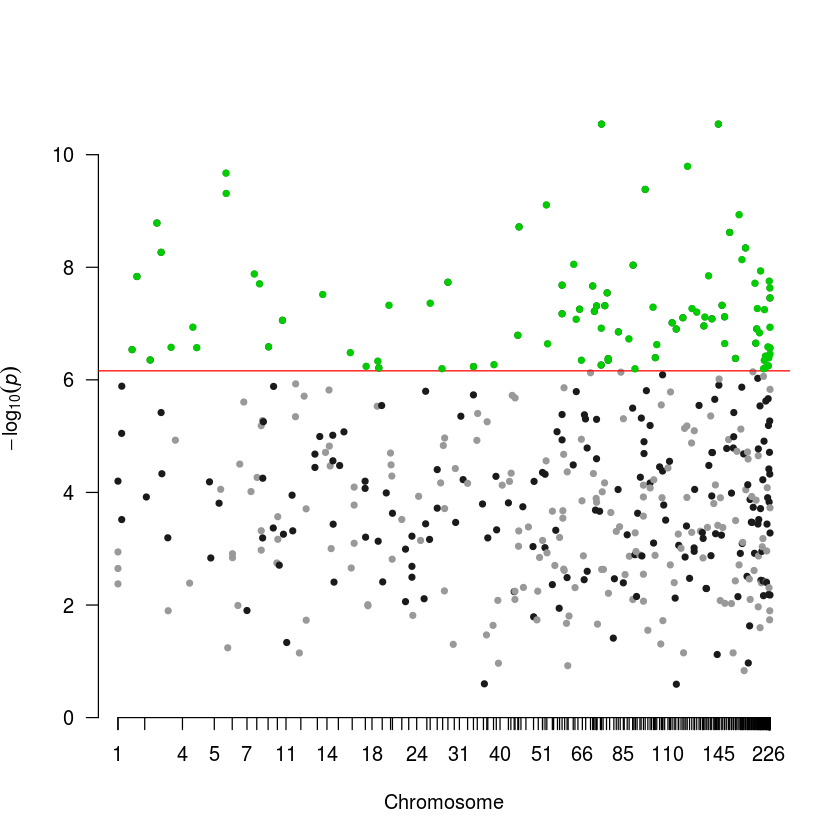

In [50]:
manhattan(allpvalssnp, highlight = ofinterest, genomewideline=6.16, suggestiveline=F)

starting and ending allele frequencies

Need to think about this, how can we denote samples where VT isn't that different from NJ and NY? 

Then, another figure is just the ones that have genes showing the location of the gene on the scaffold and the location of the snp. 

## To do next
Ok, so we need to see basically if htere are snps that are similar in frequency in all three exposed pops. Can also look for snps that change in same direction for Vt Somehow plot not just change but starting and ending.

Also need to look at the other ways of calculating maf. are they different? 

You also need to move everything around, this should go before the graphs of f1f2. 

In [78]:
(cbind.data.frame(mafsNJNY50SigVT$NewScaf, mafsNJNY50SigVT$Position, mafsNJNY50SigVT$Maf2_E.NJ, mafsNJNY50SigVT$Maf2_E.NY, mafsNJNY50SigVT$Maf2_E.VT))

mafsNJNY50SigVT$NewScaf,mafsNJNY50SigVT$Position,mafsNJNY50SigVT$Maf2_E.NJ,mafsNJNY50SigVT$Maf2_E.NY,mafsNJNY50SigVT$Maf2_E.VT
NW_005871048.1,16839644,0.047404,0.220040,0.443786
NW_005871048.1,22649683,0.536439,0.860214,0.469789
NW_005871048.1,38456248,0.714099,0.533534,0.491917
NW_005871048.1,46534125,0.140358,0.000002,0.466402
NW_005871048.1,51542832,0.712276,0.729271,0.574318
NW_005871049.1,29962249,0.659926,0.636289,0.216655
NW_005871049.1,34577793,0.285658,0.183168,0.472265
NW_005871049.1,3921142,0.241860,0.062879,0.409229
NW_005871051.1,8292792,0.279313,0.043146,0.264547
NW_005871051.1,8507307,0.726628,0.778908,0.364360


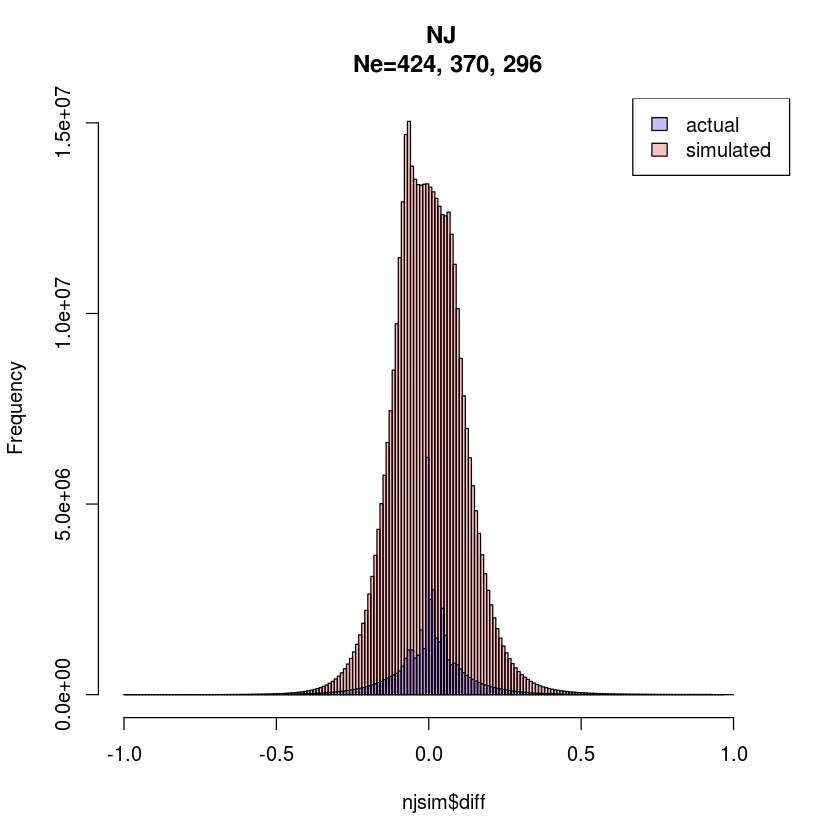

In [16]:
a=hist(njeusnpsAll$diff, plot=F, breaks=200)
s=hist(njsim$diff, plot=F, breaks=200)
    plot( s, col=rgb(1,0,0,1/4), xlim=c(-1,1.1), main=c("NJ \n Ne=424, 370, 296") ) 
    plot( a, col=rgb(0,0,1,1/4), add=T)
    legend("topright", c("actual", "simulated"), fill=c(col=rgb(0,0,1,1/4), col=rgb(1,0,0,1/4) ))

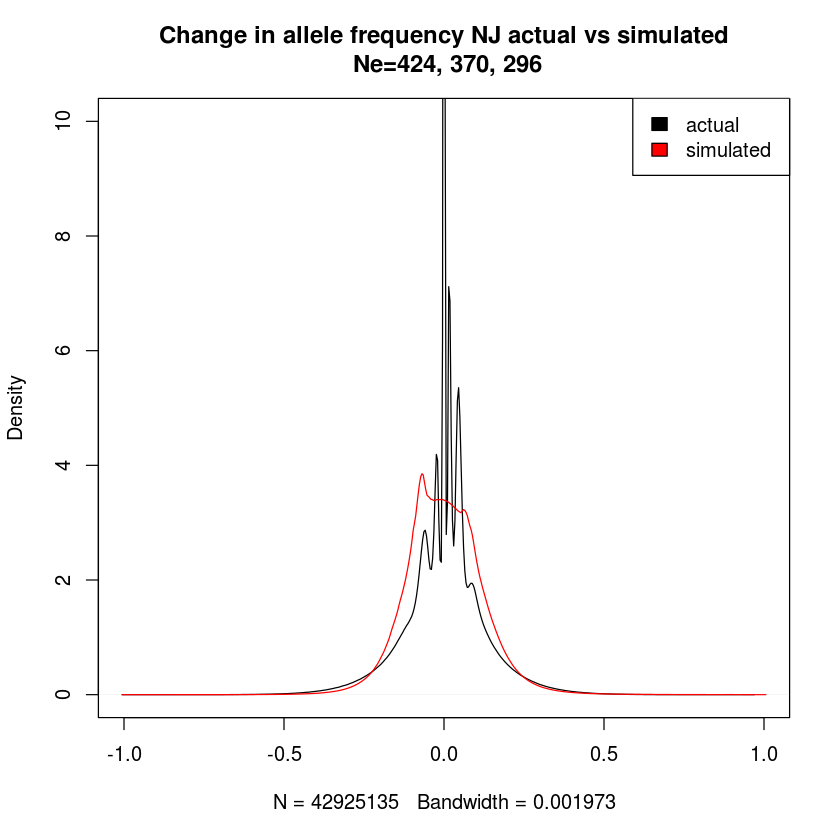

In [12]:
plot(density(njeusnpsAll$diff), main=" Change in allele frequency NJ actual vs simulated \n Ne=424, 370, 296", xlim=c(-1,1), ylim=c(0, 10))
    lines(density(njsim$diff, na.rm=TRUE), col="red") 
legend("topright", c("actual", "simulated"), fill=c("black", "red"))

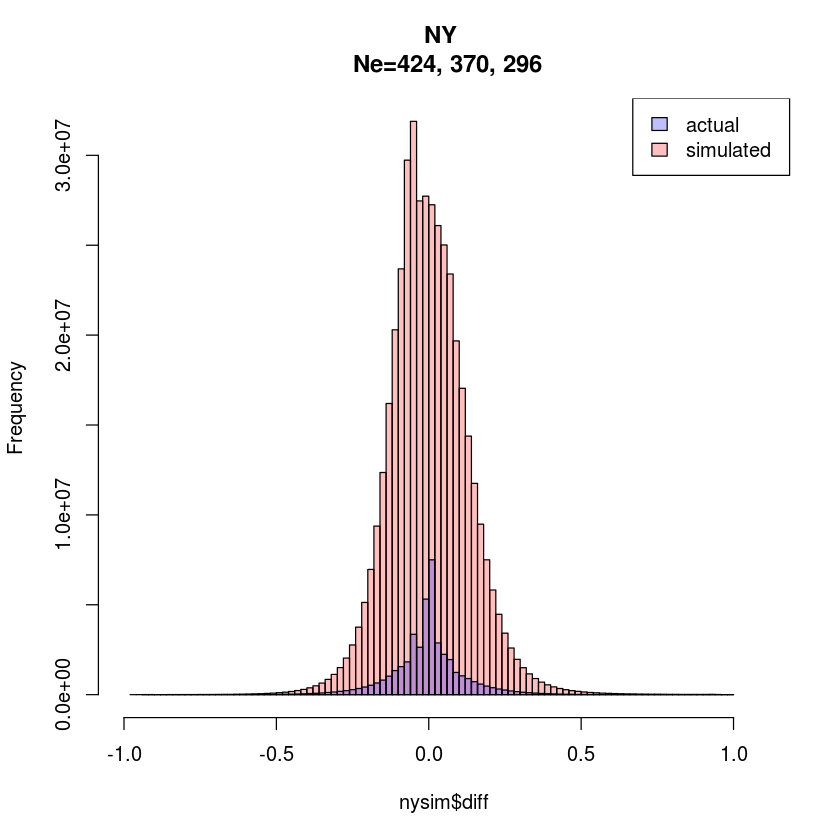

In [13]:
a=hist(nyeusnpsAll$diff, plot=F, breaks=100)
s=hist(nysim$diff, plot=F, breaks=100)
    plot( s, col=rgb(1,0,0,1/4), xlim=c(-1,1.1), main=c("NY \n Ne=424, 370, 296") ) 
    plot( a, col=rgb(0,0,1,1/4), add=T)
    legend("topright", c("actual", "simulated"), fill=c(col=rgb(0,0,1,1/4), col=rgb(1,0,0,1/4) ))

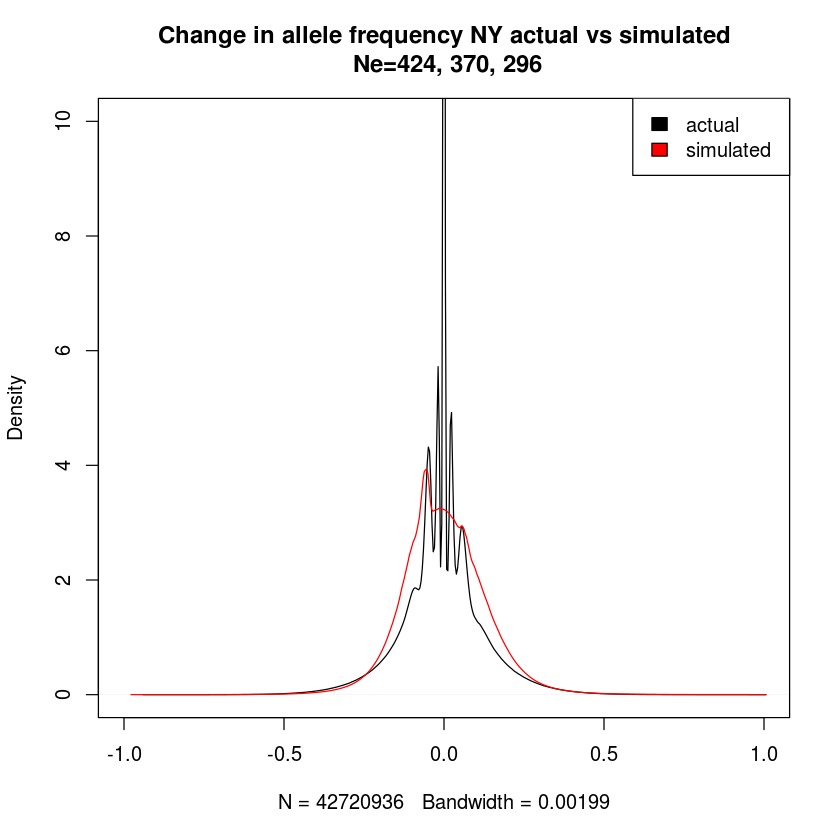

In [14]:
plot(density(nyeusnpsAll$diff), main=" Change in allele frequency NY actual vs simulated \n Ne=424, 370, 296", xlim=c(-1,1), ylim=c(0, 10))
    lines(density(nysim$diff, na.rm=TRUE), col="red") 
legend("topright", c("actual", "simulated"), fill=c("black", "red"))

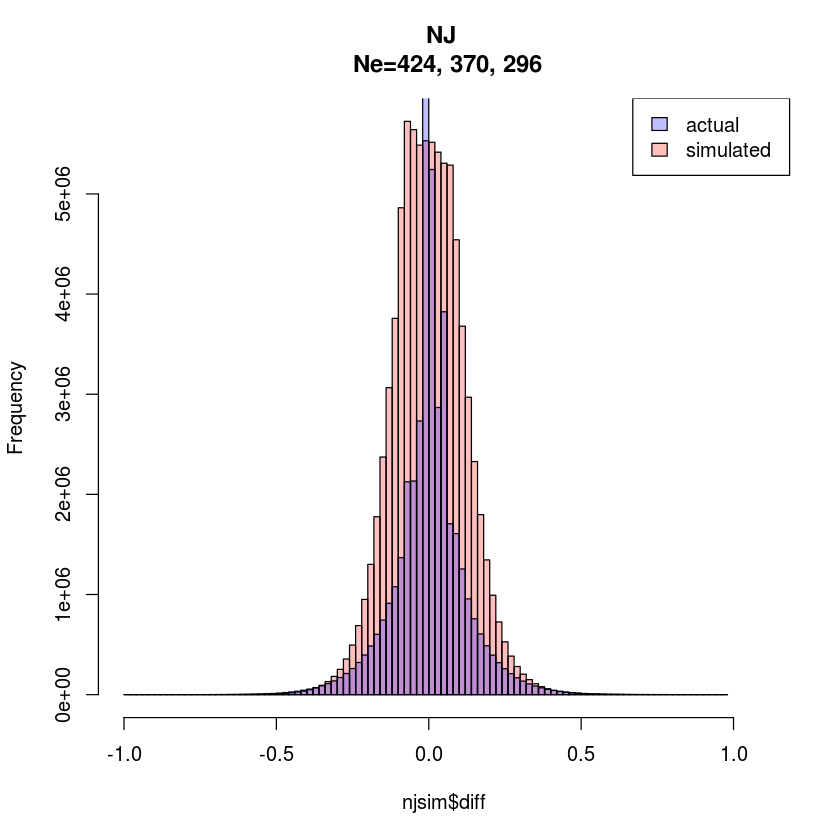

In [17]:
a=hist(njeusnpsAll$diff, plot=F, breaks=100)
s=hist(njsim$diff, plot=F, breaks=100)
    plot( s, col=rgb(1,0,0,1/4), xlim=c(-1,1.1), main=c("NJ \n Ne=424, 370, 296") ) 
    plot( a, col=rgb(0,0,1,1/4), add=T)
    legend("topright", c("actual", "simulated"), fill=c(col=rgb(0,0,1,1/4), col=rgb(1,0,0,1/4) ))

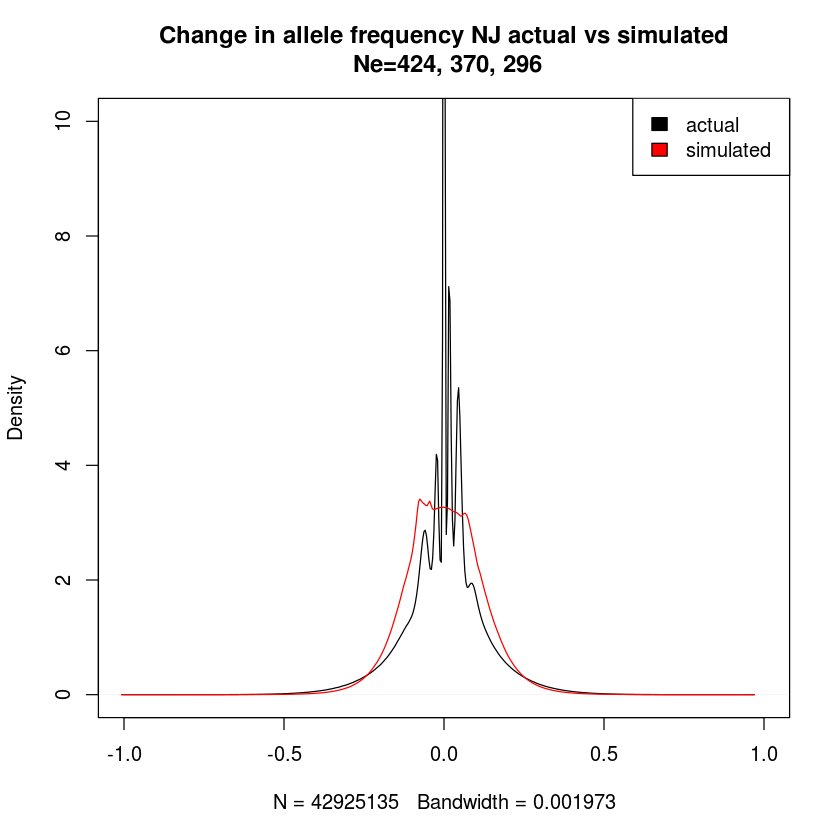

In [14]:
plot(density(njeusnpsAll$diff), main=" Change in allele frequency NJ actual vs simulated \n Ne=424, 370, 296", xlim=c(-1,1), ylim=c(0, 10))
    lines(density(njsimNA$diff), col="red") 
legend("topright", c("actual", "simulated"), fill=c("black", "red"))

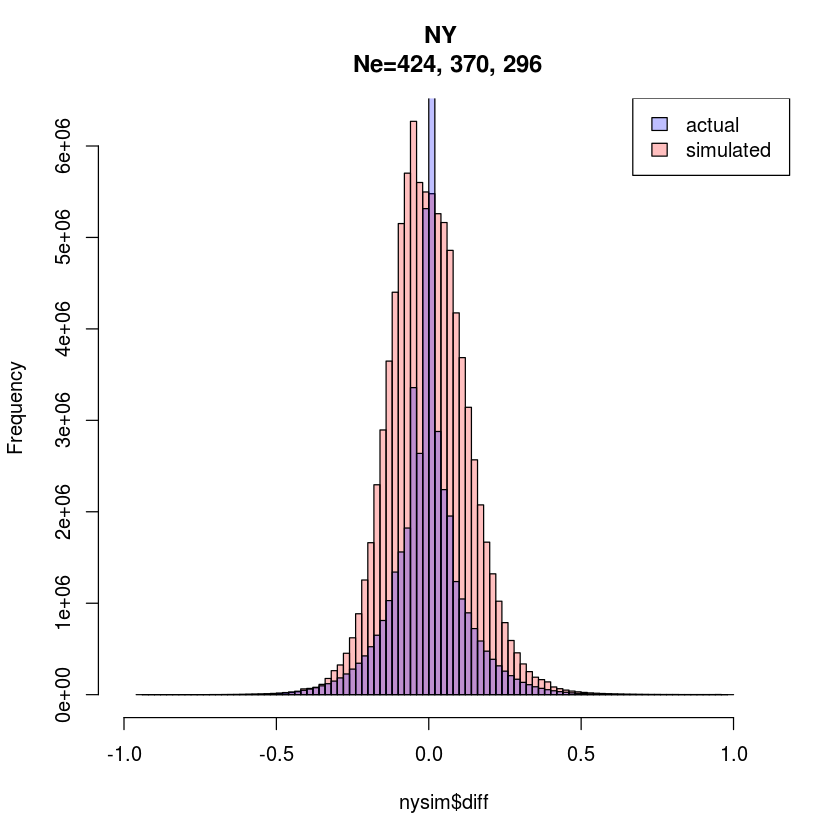

In [15]:
a=hist(nyeusnpsAll$diff, plot=F, breaks=100)
s=hist(nysim$diff, plot=F, breaks=100)
    plot( s, col=rgb(1,0,0,1/4), xlim=c(-1,1.1), main=c("NY \n Ne=424, 370, 296") ) 
    plot( a, col=rgb(0,0,1,1/4), add=T)
    legend("topright", c("actual", "simulated"), fill=c(col=rgb(0,0,1,1/4), col=rgb(1,0,0,1/4) ))

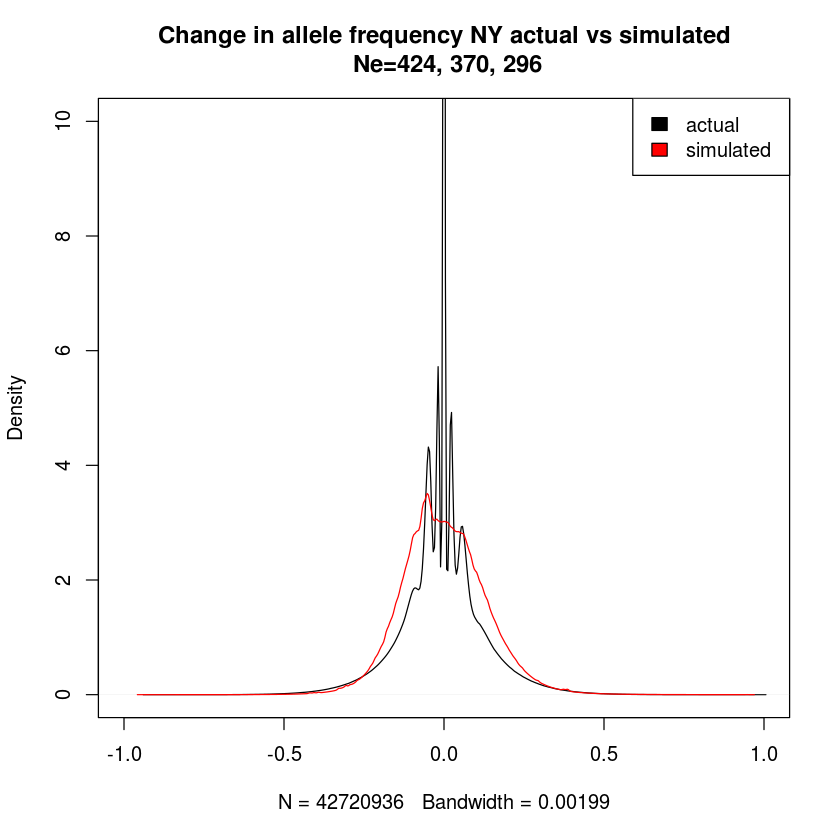

In [7]:
plot(density(nyeusnpsAll$diff), main=" Change in allele frequency NY actual vs simulated \n Ne=424, 370, 296", xlim=c(-1,1), ylim=c(0, 10))
    lines(density(nysim$diff, na.rm=TRUE), col="red") 
legend("topright", c("actual", "simulated"), fill=c("black", "red"))

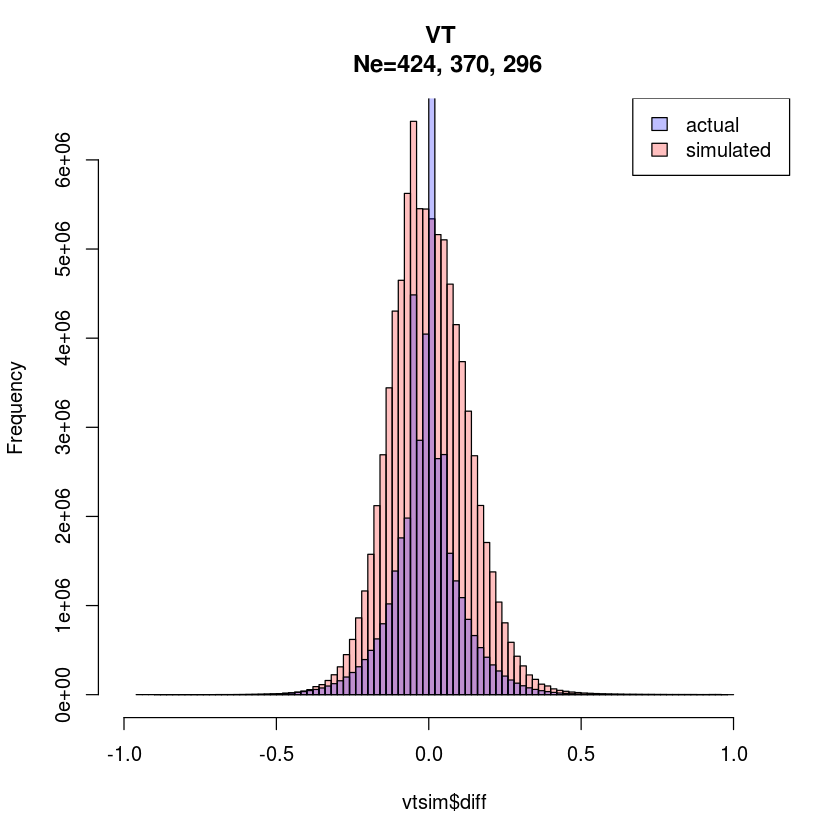

In [14]:
a=hist(vteusnpsAll$diff, plot=F, breaks=100)
s=hist(vtsim$diff, plot=F, breaks=100)
    plot( s, col=rgb(1,0,0,1/4), xlim=c(-1,1.1), main=c("VT \n Ne=424, 370, 296") ) 
    plot( a, col=rgb(0,0,1,1/4), add=T)
    legend("topright", c("actual", "simulated"), fill=c(col=rgb(0,0,1,1/4), col=rgb(1,0,0,1/4) ))

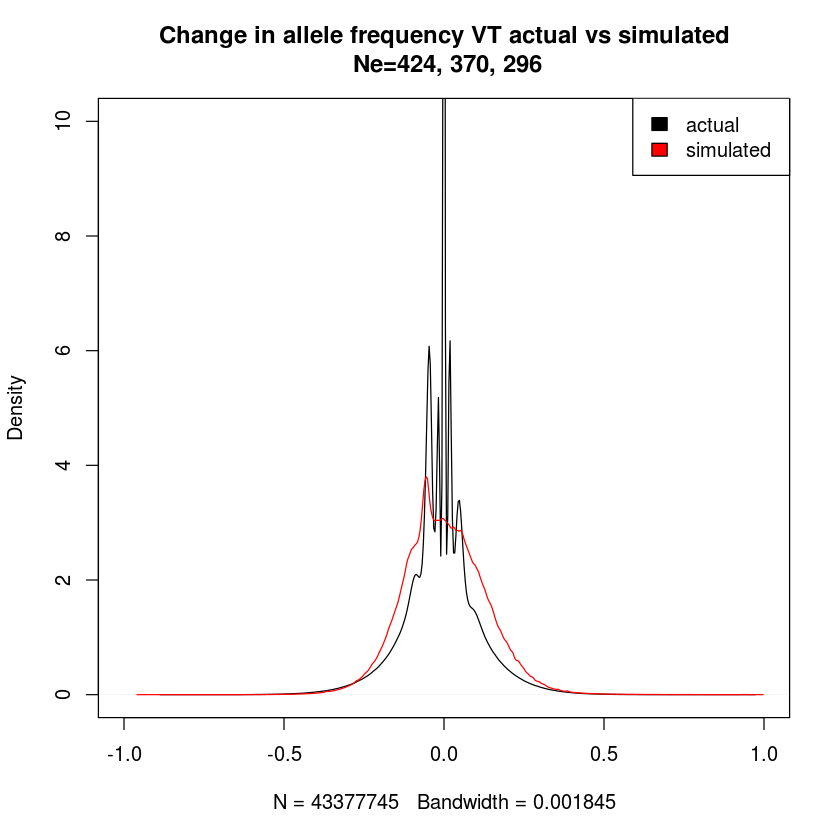

In [18]:
plot(density(vteusnpsAll$diff), main=" Change in allele frequency VT actual vs simulated \n Ne=424, 370, 296", xlim=c(-1,1), ylim=c(0, 10))
    lines(density(vtsim$diff, na.rm=TRUE), col="red") 
legend("topright", c("actual", "simulated"), fill=c("black", "red"))

## Plot change in allele frequency for significant snps

In [59]:
sigSNPS=read.csv("~/WGS/SNPS/All_mylu/snps/NJNYVT40_margCompvaluesNe354.csv", row.names=1)

In [97]:
VTSigS=vteusnpsAll[vteusnpsAll$Scaffold %in% sigSNPS$Scaffold,]
NJSigS=njeusnpsAll[njeusnpsAll$Scaffold %in% sigSNPS$Scaffold,]
NYSigS=nyeusnpsAll[nyeusnpsAll$Scaffold %in% sigSNPS$Scaffold,]

In [98]:
NJNYSigS=merge(NJSigS, NYSigS, by=c("Scaffold", "Position"))

In [99]:
NJNYVTSigS=merge(NJNYSigS, VTSigS, by=c("Scaffold", "Position"))

In [100]:
NJNYVTSigS$diffav=rowMeans(cbind(NJNYVTSigS$diff, NJNYVTSigS$diff.x, NJNYVTSigS$diff.y))

In [101]:
head(NJNYVTSigS$diff)
head(NJNYVTSigS$diff.x)
head(NJNYVTSigS$diff.y)
head(NJNYVTSigS$diffav)

[1] -0.050623 -0.052297  0.003936  0.055307 -0.156307 -0.093754

[1]  0.109715  0.090624 -0.055527 -0.111671  0.039427  0.097373

[1]  0.021936 -0.161271  0.048482 -0.023689  0.000312 -0.028052

[1]  0.027009333 -0.040981333 -0.001036333 -0.026684333 -0.038856000
[6] -0.008144333

In [81]:
(0.003936+ -0.055527+ 0.048482)/3

[1] -0.001036333

In [141]:
sigSNPSsimp=sigSNPS[-c(1, 11),]
sigSNPSsimp2=sigSNPS[-c(2, 11),]

In [115]:
NJNYVTSig=merge(NJNYVTSigS, sigSNPSsimp, by="Scaffold")

In [142]:
NJNYVTSig2=merge(NJNYVTSigS, sigSNPSsimp2, by="Scaffold")

In [116]:
NJNYVTSig$RelPos=NJNYVTSig$Position-NJNYVTSig$SNP

In [143]:
NJNYVTSig2$RelPos=NJNYVTSig2$Position-NJNYVTSig2$SNP

In [117]:
Scaffolds=sigSNPSsimp$Scaffold
Scaffolds

[1] GL429767 GL429769 GL429778 GL429785 GL429813 GL429834 GL429848 GL429849
 [9] GL429852 GL429872 GL429882 GL429966
12 Levels: GL429767 GL429769 GL429778 GL429785 GL429813 GL429834 ... GL429966

In [119]:
NJNYVTSig[NJNYVTSig$Scaffold==Scaffolds[2] & NJNYVTSig$RelPos==0,]

Scaffold,Position,V1.x,Major.x.x,Minor.x.x,Maf1_E.x,Maf2_E.x,Maf3_E.x,nInd_E.x,Major.y.x,⋯,diffav,NewScaf,SNP,Maj,Min,NJ,NY,VT,Comp,RelPos
GL429769,6378055,1499037,A,G,0.589184,0.589182,0.5835,12,A,⋯,0.5139537,NW_005871050.1,6378055,A,G,9.99999e-07,0.008175992,0.0001809998,5.907905e-10,0


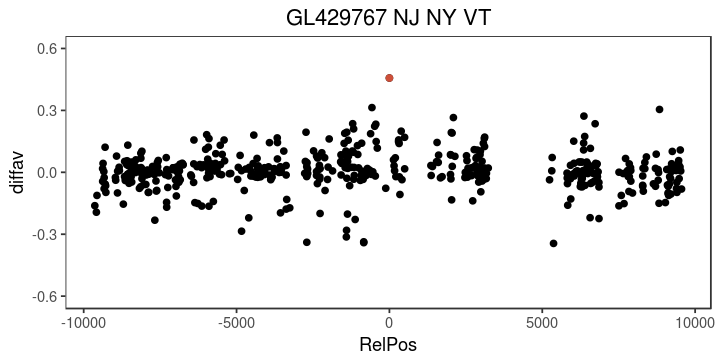

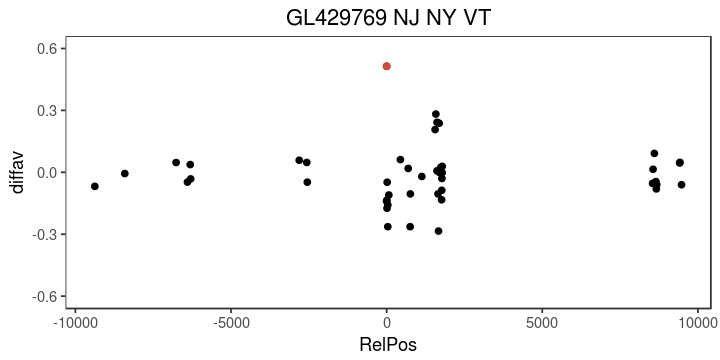

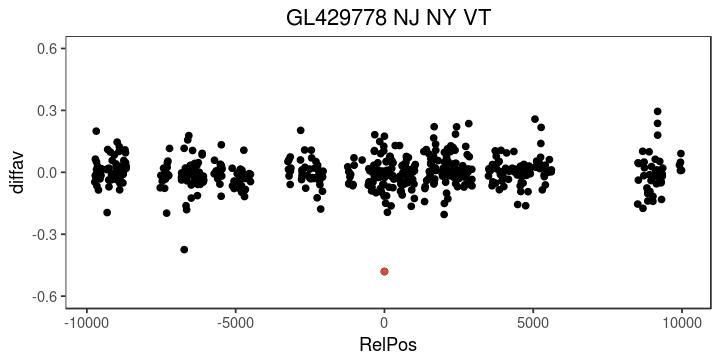

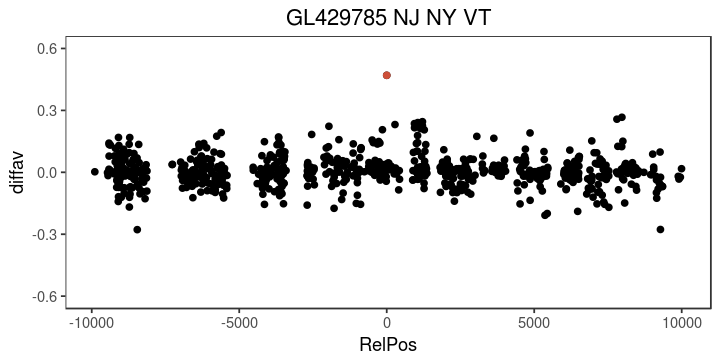

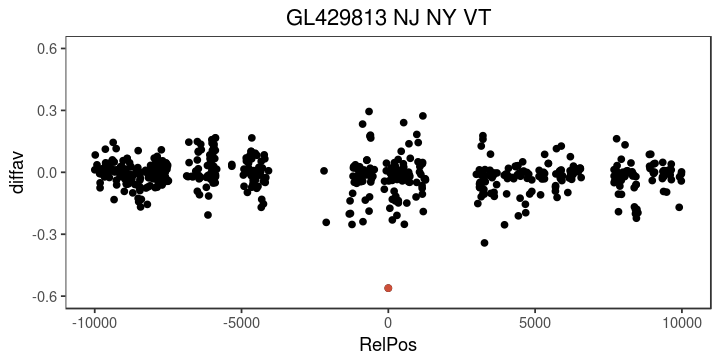

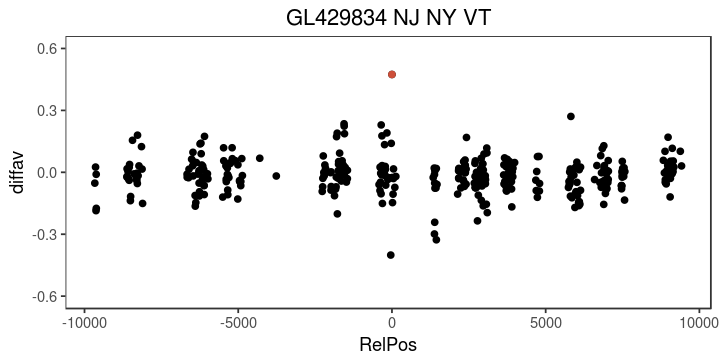

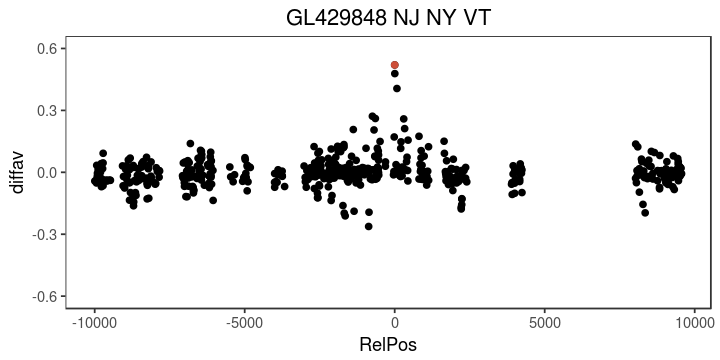

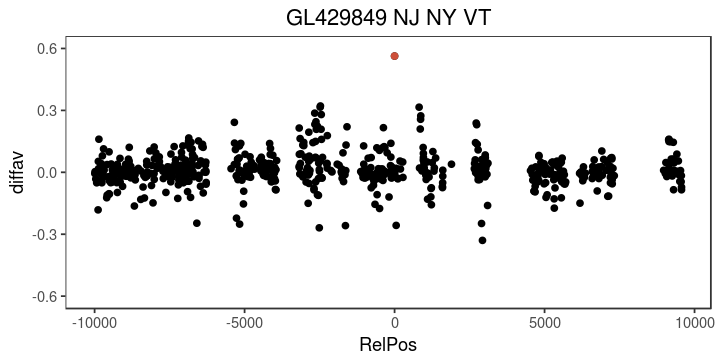

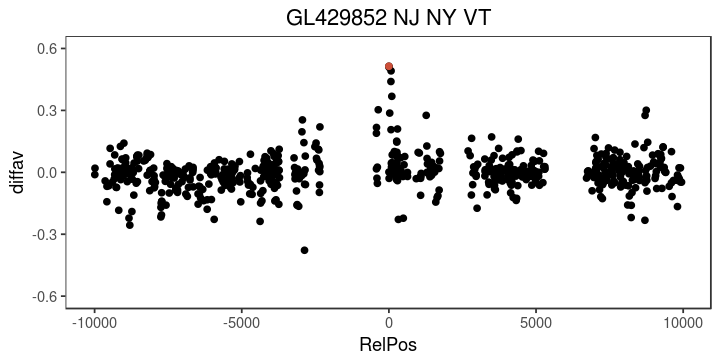

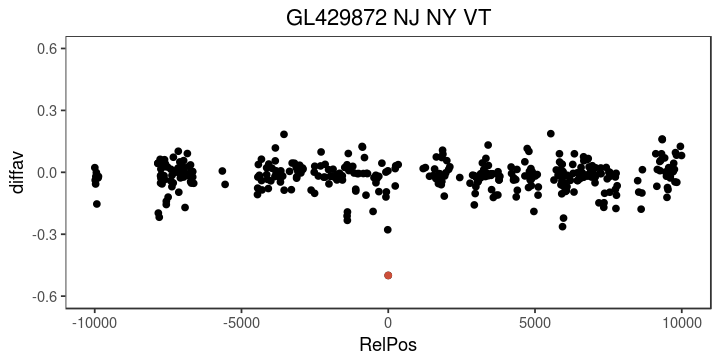

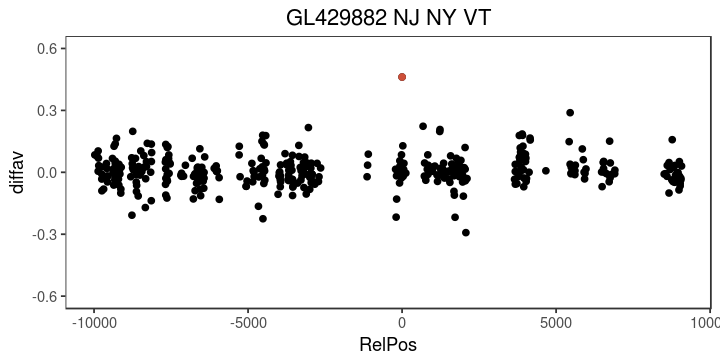

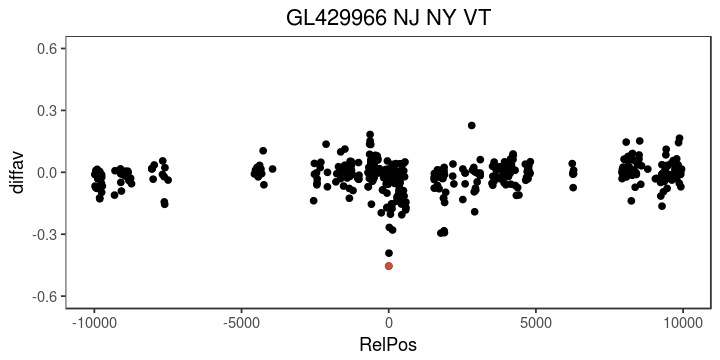

In [129]:
options(repr.plot.width=6, repr.plot.height=3)
for (i in 1:length(Scaffolds)){
all=NJNYVTSig[NJNYVTSig$Scaffold==Scaffolds[i] & NJNYVTSig$RelPos<10000 & NJNYVTSig$RelPos>(-10000),] 
snp=all[all$RelPos==0,] 
    print(ggplot()+ geom_point(data=all, aes(x=RelPos, y=diffav))+ theme_bw()
    + theme( panel.grid.minor = element_blank(), panel.grid.major = element_blank())+ ggtitle(paste0(Scaffolds[i]," NJ NY VT"))+theme(plot.title = element_text(hjust = 0.5))
    + geom_point(data=snp, aes(x=RelPos, y=diffav), colour="tomato3")
     + ylim(-0.6, 0.6))
}

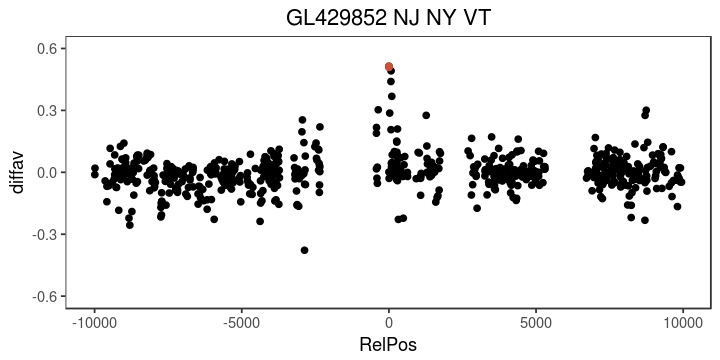

In [144]:
all=NJNYVTSig[NJNYVTSig$Scaffold==Scaffolds[9] & NJNYVTSig$RelPos<10000 & NJNYVTSig$RelPos>(-10000),] 
snp=all[all$RelPos==0|all$RelPos==8,] 
    print(ggplot()+ geom_point(data=all, aes(x=RelPos, y=diffav))+ theme_bw()
    + theme( panel.grid.minor = element_blank(), panel.grid.major = element_blank())+ ggtitle(paste0(Scaffolds[9]," NJ NY VT"))+theme(plot.title = element_text(hjust = 0.5))
    + geom_point(data=snp, aes(x=RelPos, y=diffav), colour="tomato3")
     + ylim(-0.6, 0.6))

## Look at snps only changing in NJ and NY

I keep coming back to a few concerns

- Yes, we don't have any evidence that male bats aren't mating at both VT sites but only wintering in the same site year after year, but it seems unlikely that they would do this and then consistently return to the site they were banded at. 

- If we are going to state that NJ and NY, which are 80 miles apart, are independent sites (important for getting p values) because we have not found a significant (greater than 1 or two every few years, and none of our NJ sampled bats) portion of banded bats from the other site, then I think it will be tricky to also claim that the two VT sites, which are 40 miles apart, are one. Theoretically, if male bats are mating at two sites but only wintering at one, this could be happening in NY and NJ. 

I want to avoid a scenario where there are significant differences in alelle freqs between the two VT sites pre-wns that end up looking like changes in allele freqs over time, but aren't actually.  In reality, this would just cause us to unnecessarily reduce our list of snps with high changes in allele freq in NJ and NY unnecessarily based on false criteria and miss producing a list of snps that are actually changing in three populations, focusing on NJ and NY as our criteria for filtering snps would therefore be the more conservative choice. 



In [12]:
head(njnyeusnpAll)

Scaffold,Position,V1.x,Major.x.x,Minor.x.x,Maf1_E.x,Maf2_E.x,Maf3_E.x,nInd_E.x,Major.y.x,⋯,Maf3_E.y,nInd_E.y,Major.y.y,Minor.y.y,Maf1_U.y,Maf2_U.y,Maf3_U.y,nInd_U.y,diff.y,avdiffnjny
AAPE02055386,57060,1,T,C,0.000000,0.000005,0.000000,12,T,⋯,0.000000,11,T,C,0.000000,0.000005,0.000000,12,0.000001,-0.0162425
AAPE02055386,67758,2,C,T,0.067869,0.022733,0.037396,10,C,⋯,0.000000,10,C,T,0.043370,0.043371,0.061623,19,-0.043368,-0.0270405
AAPE02055386,67765,1,C,T,0.000000,0.000003,0.000000,11,C,⋯,0.000000,11,C,T,0.038368,0.037756,0.041336,19,-0.037752,-0.0188755
AAPE02055386,67766,2,G,A,0.062912,0.020990,0.038813,11,G,⋯,0.000000,10,G,A,0.037757,0.012754,0.040748,19,-0.012751,0.0041185
AAPE02055386,67785,3,G,A,0.000000,0.000002,0.000000,11,G,⋯,0.000000,11,G,A,0.000000,0.000002,0.000000,18,0.000002,-0.0168030
AAPE02055386,67795,3,C,T,0.255406,0.255405,0.262683,12,C,⋯,0.204537,11,C,T,0.273954,0.273961,0.232749,18,-0.068610,0.0470730


In [25]:
njnyeunegfilt$avdiffnjny=apply(X=cbind(njnyeunegfilt$diff.x, njnyeunegfilt$diff.y), 1, FUN=mean)

In [19]:
njnyeusnps50=njnyeusnpsfilt[njnyeusnpsfilt$diff.x>0.50& njnyeusnpsfilt$diff.y>0.50,]
njnyeuneg50=njnyeunegfilt[njnyeunegfilt$diff.x<(-0.50)& njnyeunegfilt$diff.y<(-0.50),]

In [20]:
NROW(njnyeusnps50)
NROW(njnyeuneg50)

[1] 221

[1] 241

In [1]:
221+241

[1] 462

In [21]:
njnyeusnps50All=rbind(njnyeuneg50, njnyeusnps50)

In [ ]:
write.csv(njnyeusnps50All, file="~/WGS/SNPS/All_mylu/snps/njnyeu50.csv")

In [57]:
njnyeusnps46=njnyeusnpsfilt[njnyeusnpsfilt$diff.x>0.46& njnyeusnpsfilt$diff.y>0.46 & njnyeusnpsfilt$diff.y<0.5,]
njnyeuneg46=njnyeunegfilt[njnyeunegfilt$diff.x<(-0.46)& njnyeunegfilt$diff.y<(-0.46)& njnyeunegfilt$diff.y > (-0.5),]

In [58]:
NROW(njnyeusnps46)
NROW(njnyeuneg46)

[1] 259

[1] 327

In [59]:
njnyeusnps46All=rbind(njnyeuneg46, njnyeusnps46)

In [60]:
write.csv(njnyeusnps46All, file="~/WGS/SNPS/All_mylu/snps/njnyeu46.csv")

In [39]:
njnyeusnps50All=read.csv("~/WGS/SNPS/All_mylu/snps/njnyeu50.csv")

In [40]:
NROW(njnyeusnps50All)

[1] 462

In [15]:
njnyeusnps50All$V1.x=NULL

In [41]:
colnames(njnyeusnps50All)=c( 'V1', 'Scaffold', 'Position', 'Major', 'Minor', 'Maf1_E', 'Maf2_E', 'Maf3_E', 'nInd_E', 'Major.y', 'Minor.y', 'Maf1_U', 'Maf2_U', 'Maf3_U', 'nInd_U', 'diff', 'nInd')
head(njnyeusnps50All)

V1,Scaffold,Position,Major,Minor,Maf1_E,Maf2_E,Maf3_E,nInd_E,Major.y,⋯,NA,NA.1,NA.2,NA.3,NA.4,NA.5,NA.6,NA.7,NA.8,NA.9
1,1,GL429767,4479568,G,T,0.145681,0.145682,0.163082,13,⋯,0.222771,11,G,T,0.590248,0.590241,0.598411,16,-0.515986,5
2,2,GL429767,4550108,T,C,0.234004,0.234005,0.251118,14,⋯,0.123008,11,T,C,0.659115,0.659116,0.656050,13,-0.526435,2
3,3,GL429767,16839644,T,A,0.137273,0.047404,0.145505,10,⋯,0.242342,10,T,A,0.925567,0.925564,0.943745,9,-0.705524,1
4,4,GL429767,33884819,A,C,0.224189,0.224189,0.265346,14,⋯,0.275169,8,A,C,0.627568,0.627566,0.626921,11,-0.542893,3
5,5,GL429767,46534125,C,T,0.140358,0.140358,0.159855,15,⋯,0.000000,10,C,T,0.574615,0.574615,0.567234,15,-0.574613,5
6,6,GL429767,52446764,T,C,0.177801,0.177800,0.178730,12,⋯,0.175230,11,T,C,0.596921,0.596915,0.626487,16,-0.548588,5


## Look at snps that are changing just in 1 population

I could do:
Everything above 0.9

Evertying above 0.8?

Everything above a lower theshold that is on a scaffold found in our significant across all three? (shoudl this be only the truly significant ones or all of them?)

I could just literally run everything above 0.5 and then look for significant snps...but would take a while, and this is still possibly problematic. 



Can you filter them ahead of time. using number of individuals and maybe also ones where the 2 mafs agree?
Maybe you should actually use a different maf estimator...

In [26]:
njeu80=njeusnpsfilt[njeusnpsfilt$diff>0.8,]
nyeu80=nyeusnpsfilt[nyeusnpsfilt$diff>0.8,]
vteu80=vteusnpsfilt[vteusnpsfilt$diff>0.8,]
njeun80=njeunegfilt[njeunegfilt$diff<(-0.8),]
nyeun80=nyeunegfilt[nyeunegfilt$diff<(-0.8),]
vteun80=vteunegfilt[vteunegfilt$diff<(-0.8),]

In [40]:
NROW(njeun80)

[1] 250

In [49]:
NROW(njeu80)
NROW(nyeu80)
NROW(vteu80)
NROW(njeun80)
NROW(nyeun80)
NROW(vteun80)

[1] 63

[1] 129

[1] 21

[1] 250

[1] 98

[1] 33

In [50]:
63+129+21+250+98+33

[1] 594

In [58]:
njeuAll80=rbind(njeu80, njeun80)
nyeuAll80=rbind(nyeu80, nyeun80)
vteuAll80=rbind(vteu80, vteun80)

In [10]:
njeuAll80$X=NULL
nyeuAll80$X=NULL
vteuAll80$X=NULL

In [11]:
colnames(njeuAll80)=c( 'V1', 'Scaffold', 'Position', 'Major', 'Minor', 'Maf1_E', 'Maf2_E', 'Maf3_E', 'nInd_E', 'Major.y', 'Minor.y', 'Maf1_U', 'Maf2_U', 'Maf3_U', 'nInd_U', 'diff', 'nInd')
colnames(nyeuAll80)=c('V1', 'Scaffold', 'Position', 'Major', 'Minor', 'Maf1_E', 'Maf2_E', 'Maf3_E', 'nInd_E', 'Major.y', 'Minor.y', 'Maf1_U', 'Maf2_U', 'Maf3_U', 'nInd_U', 'diff', 'nInd')
colnames(vteuAll80)=c( 'V1', 'Scaffold', 'Position', 'Major', 'Minor', 'Maf1_E', 'Maf2_E', 'Maf3_E', 'nInd_E', 'Major.y', 'Minor.y', 'Maf1_U', 'Maf2_U', 'Maf3_U', 'nInd_U', 'diff', 'nInd')

In [4]:
njeuAll80=read.csv("~/WGS/SNPS/All_mylu/snps/njeu80.csv")
nyeuAll80=read.csv("~/WGS/SNPS/All_mylu/snps/nyeu80.csv")
vteuAll80=read.csv("~/WGS/SNPS/All_mylu/snps/vteu80.csv")

In [12]:
write.csv(njeuAll80, file="~/WGS/SNPS/All_mylu/snps/njeu80.csv")
write.csv(nyeuAll80, file="~/WGS/SNPS/All_mylu/snps/nyeu80.csv")
write.csv(vteuAll80, file="~/WGS/SNPS/All_mylu/snps/vteu80.csv")

In [5]:
njvteu40=merge(njeu40, vteu40, by=c("Scaffold", "Position"))
njnyvteu40=merge(njvteu40, nyeu40, by=c("Scaffold", "Position"))
NROW(njnyvteu40)

[1] 39

In [8]:
write.csv(njnyvteu40, file="~/WGS/SNPS/All_mylu/snps/njnyvteu40.csv")

In [6]:
njnyvteu40dupes=njnyvteu40[njnyvteu40$Scaffold %in% njnyvteu40$Scaffold[duplicated(njnyvteu40$Scaffold)],]

In [7]:
njnyvteu40dupes

Scaffold,Position,V1.x,Major.x.x,Minor.x.x,Maf1_E.x,Maf2_E.x,Maf3_E.x,nInd_E.x,Major.y.x,⋯,Maf2_E,Maf3_E,nInd_E,Major.y,Minor.y,Maf1_U,Maf2_U,Maf3_U,nInd_U,diff
GL429767,10265656,225945,T,C,0.843202,0.843202,0.833381,15,T,⋯,0.708026,0.732224,11,T,C,0.260631,0.260634,0.244548,13,0.447392
GL429767,39819883,600380,G,C,0.566047,0.566044,0.555731,15,G,⋯,0.488130,0.469819,13,G,C,0.152466,0.056189,0.159319,11,0.431941
GL429768,4318783,1013835,C,T,0.759476,0.759475,0.741288,15,C,⋯,0.635064,0.614687,12,C,T,0.143789,0.143787,0.149299,12,0.491277
GL429768,11968353,1125438,T,C,0.719161,0.719157,0.724949,15,T,⋯,0.635200,0.610357,14,T,C,0.203301,0.203304,0.134005,13,0.431896
GL429785,7341092,4842257,T,G,0.460767,0.460765,0.479746,16,T,⋯,0.698873,0.667001,8,T,G,0.233027,0.233030,0.173951,11,0.465843
GL429785,11292450,4896243,G,A,0.532096,0.532098,0.521239,11,G,⋯,0.514216,0.518285,11,G,A,0.113668,0.113668,0.124248,13,0.400548
GL429848,2603829,10639750,T,C,0.769942,0.769944,0.755288,17,T,⋯,0.730515,0.714715,10,T,C,0.200311,0.200315,0.158075,15,0.530200
GL429848,2603833,10639751,G,A,0.681770,0.681772,0.670903,17,G,⋯,0.683366,0.676028,11,G,A,0.200414,0.200418,0.173576,15,0.482948
GL429852,463033,10864262,G,A,0.712987,0.712990,0.698510,14,G,⋯,0.835608,0.808837,10,G,A,0.209286,0.208652,0.213713,13,0.626956
GL429852,463041,10864263,G,A,0.711730,0.711733,0.697364,14,G,⋯,0.835610,0.808837,10,G,A,0.261612,0.261620,0.240861,13,0.573990


In [9]:
njvteun40=merge(njeun40, vteun40, by=c("Scaffold", "Position"))
njnyvteun40=merge(njvteun40, nyeun40, by=c("Scaffold", "Position"))
NROW(njnyvteun40)

[1] 54

In [10]:
njnyvteu40abs=rbind(njnyvteu40, njnyvteun40)

In [16]:
njnyvteu40abs$V1.x=NULL

In [18]:
njnyvteu40abs=njnyvteu40abs[order(Scaffold),] 

In [19]:
write.table(njnyvteu40abs, file="~/WGS/SNPS/All_mylu/snps/njnyvteu40.txt", sep="\t", row.names=FALSE)

In [125]:
njnyvteun40dupes=njnyvteun40[njnyvteun40$Scaffold %in% njnyvteun40$Scaffold[duplicated(njnyvteun40$Scaffold)],]

In [127]:
njnyvteun40dupes

Scaffold,Position,Major.x.x,Minor.x.x,Maf1_E.x,Maf2_E.x,Maf3_E.x,nInd_E.x,Major.y.x,Minor.y.x,⋯,Maf2_E,Maf3_E,nInd_E,Major.y,Minor.y,Maf1_U,Maf2_U,Maf3_U,nInd_U,diff
GL429767,24450613,T,A,0.391122,0.139307,0.382578,7,T,A,⋯,0.052677,0.183578,11,T,A,0.454501,0.454502,0.424181,14,-0.401825
GL429767,35761989,A,G,0.399672,0.399679,0.383488,14,A,G,⋯,0.000005,0.000000,9,A,G,0.539826,0.539828,0.536987,8,-0.539823
GL429767,45231339,T,G,0.157642,0.157648,0.152617,18,T,G,⋯,0.112390,0.332145,11,T,G,0.634642,0.634637,0.641243,10,-0.522247
GL429767,56161793,A,G,0.113784,0.113787,0.132387,14,A,G,⋯,0.278631,0.254968,13,A,G,0.685945,0.685944,0.648649,15,-0.407313
GL429767,56933899,C,A,0.262850,0.262858,0.257121,13,C,A,⋯,0.510932,0.511233,13,C,A,0.924084,0.924081,0.958059,9,-0.413149
GL429778,11429827,G,A,0.109475,0.109028,0.101139,13,G,A,⋯,0.025994,0.041336,10,G,A,0.532094,0.532085,0.536916,13,-0.506091
GL429778,12336014,G,C,0.150362,0.149942,0.151976,11,G,C,⋯,0.287926,0.310626,11,G,C,0.875592,0.875591,0.870589,12,-0.587665
GL429831,2610488,C,G,0.168082,0.168087,0.167119,16,C,G,⋯,0.259934,0.275320,15,C,G,0.796073,0.796069,0.802006,11,-0.536135
GL429831,2755974,A,C,0.050583,0.017246,0.037537,13,A,C,⋯,0.023305,0.096415,12,A,C,0.503407,0.503401,0.508492,8,-0.480096
GL429992,204614,C,A,0.108448,0.033572,0.115510,14,C,A,⋯,0.047138,0.170072,11,C,A,0.531833,0.531832,0.597928,16,-0.484694


In [128]:
poschr=njnyvteu40dupes$Scaffold
negchr=njnyvteun40dupes$Scaffold

In [129]:
poschr=as.data.frame(poschr)
negchr=as.data.frame(negchr)
colnames(poschr)="Scaffold"
colnames(negchr)="Scaffold"

In [130]:
njnyvteuposchr=merge(poschr, njnyvteu, by="Scaffold") 
njnyvteunegchr=merge(negchr, njnyvteu, by="Scaffold") 

In [131]:
neg40=as.data.frame(cbind(njnyvteunegchr$Scaffold, njnyvteunegchr$Position, njnyvteunegchr$diffav))
colnames(neg40)=c("Scaf", "BP", "P")
neg40$CHR=as.numeric(neg40$Scaf)


In [132]:
neg40$BP=as.numeric(neg40$BP)
neg40$P=as.numeric(neg40$P)
neg40$Scaf=NULL

Warning message in manhattan(neg40, ylim = c(-1, 1), logp = FALSE):
“No SNP column found. OK unless you're trying to highlight.”

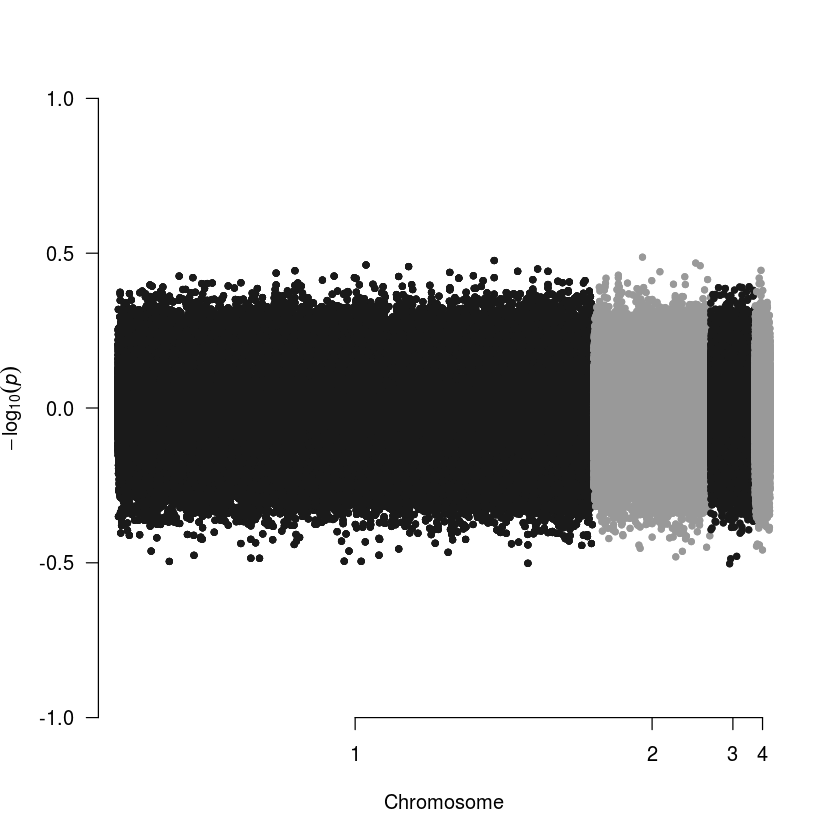

In [133]:
neg40=as.data.frame(cbind(njnyvteunegchr$Scaffold, njnyvteunegchr$Position, njnyvteunegchr$diffav))
colnames(neg40)=c("Scaf", "BP", "P")
neg40$CHR=as.numeric(neg40$Scaf)
neg40$BP=as.numeric(neg40$BP)
neg40$P=as.numeric(neg40$P)
neg40$Scaf=NULL
manhattan(neg40, ylim=c(-1,1), logp=FALSE)

Warning message in manhattan(subset(neg40, CHR == 1), ylim = c(-1, 1), logp = FALSE):
“No SNP column found. OK unless you're trying to highlight.”

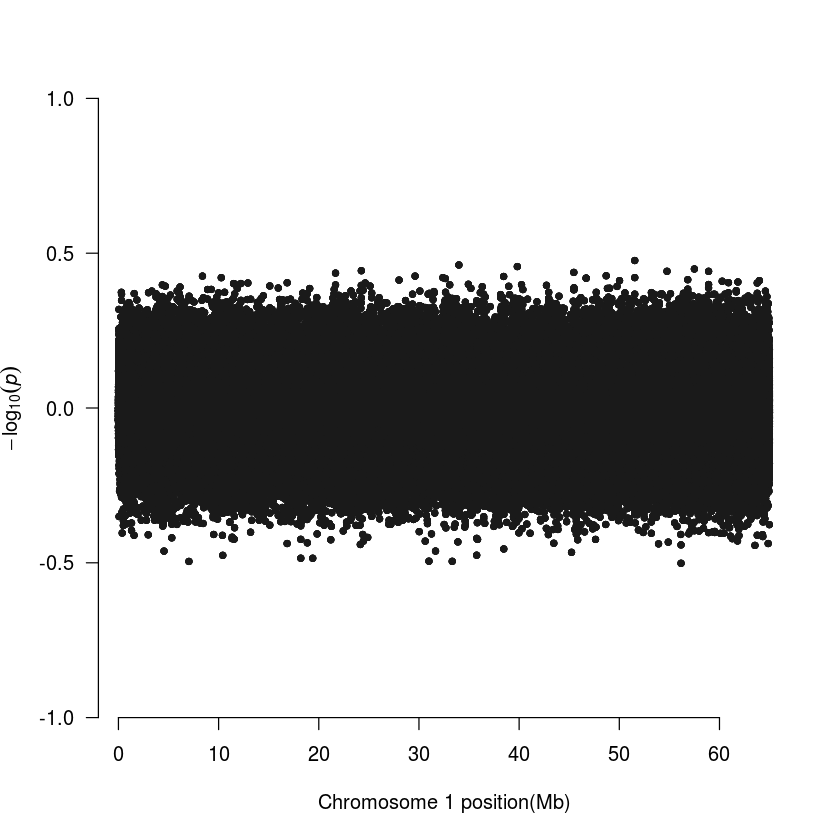

In [141]:
manhattan(subset(neg40, CHR ==1), ylim=c(-1,1), logp=FALSE)

Warning message in manhattan(subset(neg40, CHR == 3), ylim = c(-1, 1), logp = FALSE):
“No SNP column found. OK unless you're trying to highlight.”

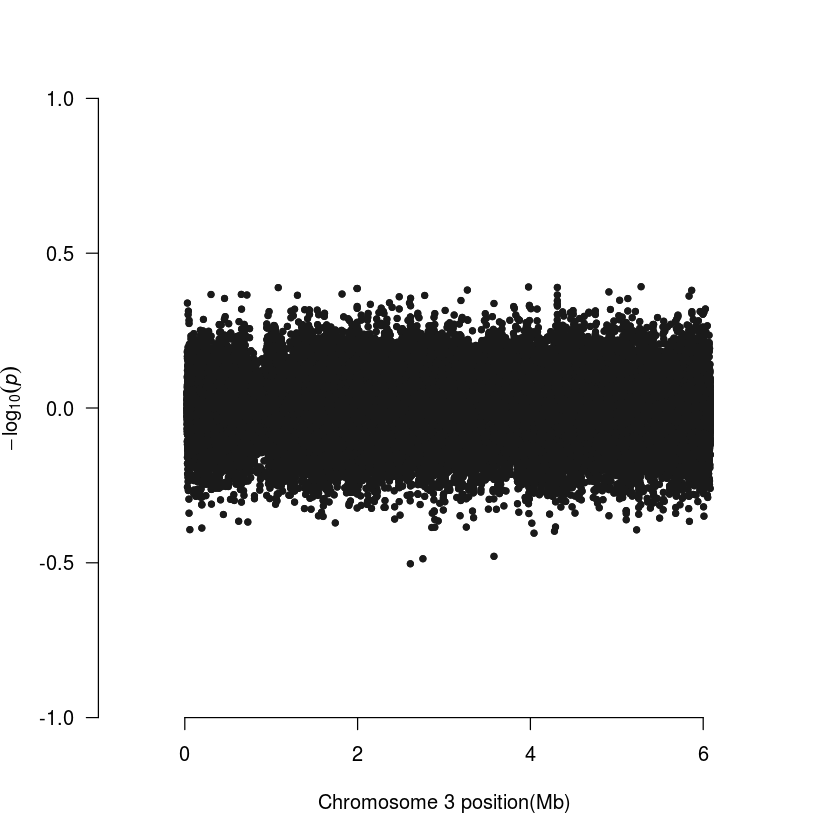

In [140]:
manhattan(subset(neg40, CHR ==3), ylim=c(-1,1), logp=FALSE)

In [134]:
pos40=as.data.frame(cbind(njnyvteuposchr$Scaffold, njnyvteuposchr$Position, njnyvteuposchr$diffav))
colnames(pos40)=c("Scaf", "BP", "P")
pos40$CHR=as.numeric(pos40$Scaf)
pos40$BP=as.numeric(pos40$BP)
pos40$P=as.numeric(pos40$P)
pos40$Scaf=NULL


Warning message in manhattan(pos40, ylim = c(-1, 1), logp = FALSE):
“No SNP column found. OK unless you're trying to highlight.”

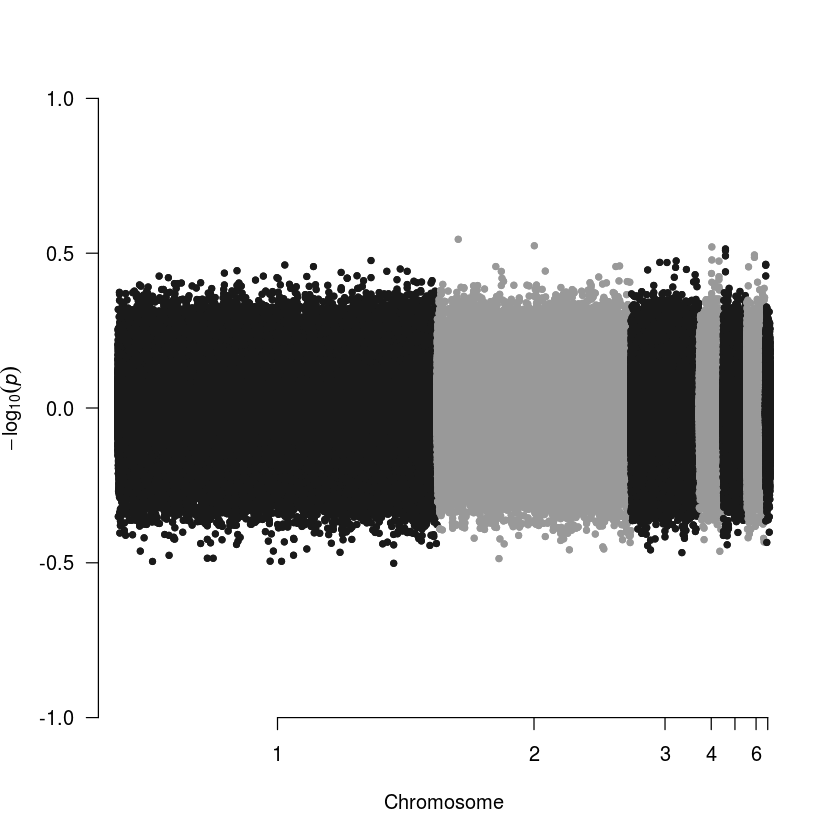

In [135]:
manhattan(pos40, ylim=c(-1,1), logp=FALSE)

Warning message in manhattan(subset(pos40, CHR == 4), ylim = c(-1, 1), logp = FALSE):
“No SNP column found. OK unless you're trying to highlight.”

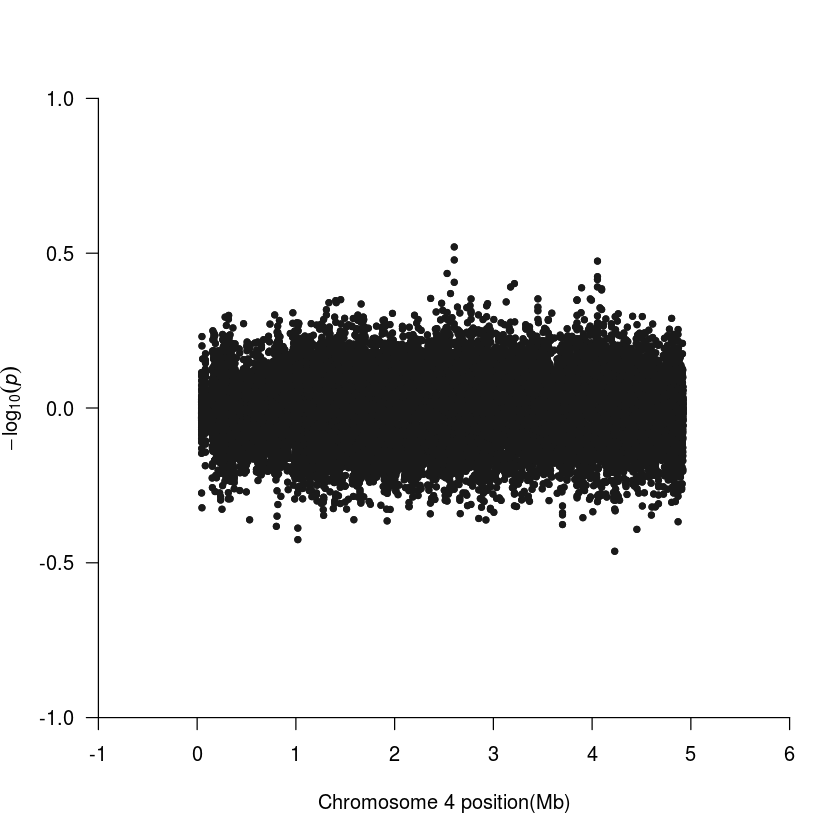

In [136]:
manhattan(subset(pos40, CHR ==4), ylim=c(-1,1), logp=FALSE)

Look at changes in linkage disequeilibrium from pre to post. Also changes in diversity. 

Warning message in manhattan(subset(pos40, CHR == 5), ylim = c(-1, 1), logp = FALSE):
“No SNP column found. OK unless you're trying to highlight.”

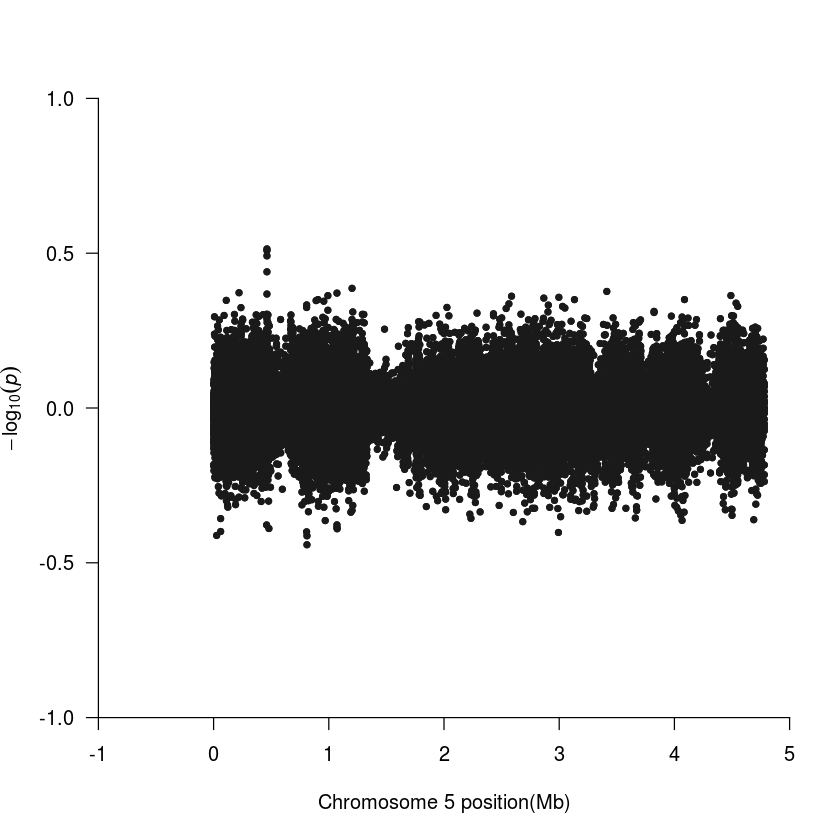

In [137]:
manhattan(subset(pos40, CHR ==5), ylim=c(-1,1), logp=FALSE)

Warning message in manhattan(subset(pos40, CHR == 6), ylim = c(-1, 1), logp = FALSE):
“No SNP column found. OK unless you're trying to highlight.”

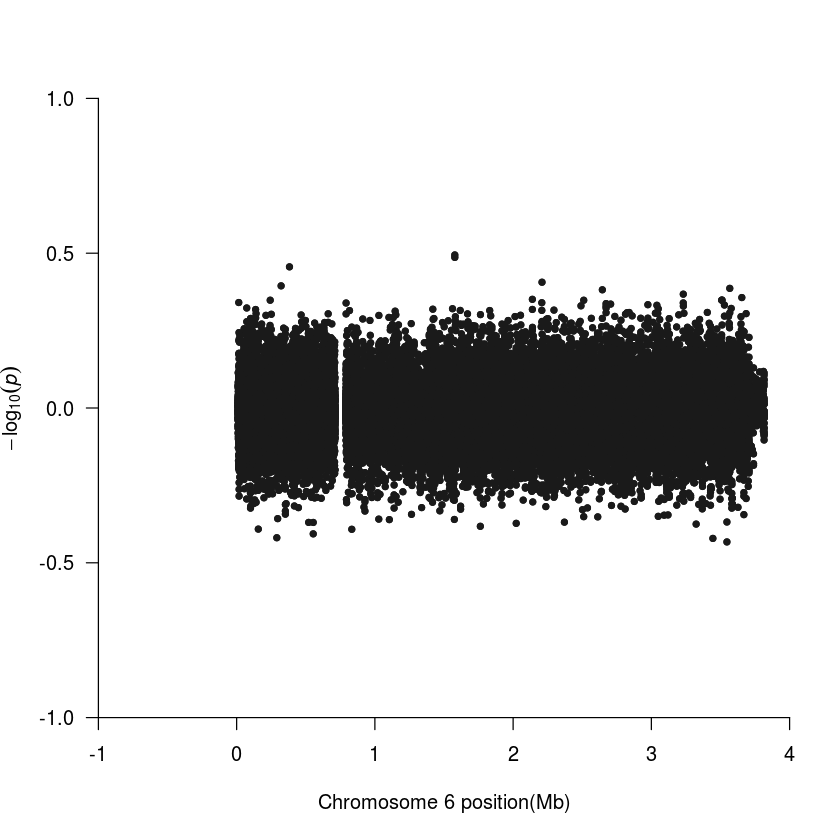

In [138]:
manhattan(subset(pos40, CHR ==6), ylim=c(-1,1), logp=FALSE)